# **Preparação do Ambiente**

Conectando o Google Colab ao Google Drive para acessar, ler e gravar os arquivos.

In [ ]:
from google.colab import drive # Importando o módulo Drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output # Permite limpar a saída do console.

# **Extração**

## **Fundamentos das Empresas**

Extraindo os arquivos .zip dos dados fundamentais (balanços patrimoniais e demonstrativo de resultados) das empresas que estão armazenados no Google Drive.

In [ ]:
import os # Importa o módulo os para ler/escrever arquivos (https://docs.python.org/pt-br/3/library/os.html).
import zipfile # Importa o módulo zipfile para trabalhar com arquivos .zip (https://docs.python.org/pt-br/3/library/zipfile.html).
import pandas as pd # Importa a biblioteca pandas para trabalhar com manipulação de dados em Python.

diretorio_zip = "/content/drive/MyDrive/TCC/balancos_zip" # Define o caminho do diretório onde os arquivos .zip estão armazenados.
diretorio_destino = "/content/drive/MyDrive/TCC/balancos" # Define o caminho do diretório onde os arquivos extraídos serão armazenados.

arquivos_zip = os.listdir(diretorio_zip) # Cria uma lista com o nome dos arquivos que estão dentro do diretorio_zip.

for arquivo in arquivos_zip:
  codigo = arquivo.split("_")[1].split(".")[0] # Extrai o código do ativo a partir do nome do arquivo .zip.

  arquivo_extraido = os.path.join(diretorio_destino, f"balanco_{codigo}.xls") # Define o caminho do arquivo que será extraído.
  if os.path.exists(arquivo_extraido): # Verifica se o arquivo já foi extraído. Se sim, o código vai para o próximo loop.
    continue

  with zipfile.ZipFile(os.path.join(diretorio_zip, arquivo), "r") as zip_ref: # Abre o arquivo .zip.
    zip_ref.extract("balanco.xls", diretorio_destino) # Extrai o arquivo balanco.xls do arquivo .zip para o diretorio_destino.

  arquivo_extraido = os.path.join(diretorio_destino, "balanco.xls") # Define o caminho do arquivo extraído.
  novo_nome = os.path.join(diretorio_destino, f"balanco_{codigo}.xls") # Define o novo nome do arquivo extraído, incluindo o código do ativo.
  os.rename(arquivo_extraido, novo_nome) # Renomeia o arquivo extraído.

print("Todos os arquivos já foram extraídos e renomeados.") # Imprime uma mensagem de sucesso.
print(f'\nTotal de arquivos: {len(os.listdir(diretorio_destino))}') # Imprime o total de arquivos no diretorio_destino.

lista_arquivos = os.listdir(diretorio_destino) # Cria uma lista com os nomes dos arquivos no diretorio_destino.
lista_arquivos.sort() # Ordena a lista de arquivos.
print(f"\nLista de arquivos: {lista_arquivos}") # Imprime a lista de arquivos.


Todos os arquivos já foram extraídos e renomeados.

Total de arquivos: 100

Lista de arquivos: ['balanco_ABEV3.xls', 'balanco_ALPA4.xls', 'balanco_ALSO3.xls', 'balanco_ARZZ3.xls', 'balanco_ASAI3.xls', 'balanco_AURE3.xls', 'balanco_AZUL4.xls', 'balanco_B3SA3.xls', 'balanco_BBAS3.xls', 'balanco_BBDC3.xls', 'balanco_BBDC4.xls', 'balanco_BBSE3.xls', 'balanco_BEEF3.xls', 'balanco_BPAC11.xls', 'balanco_BRAP4.xls', 'balanco_BRFS3.xls', 'balanco_BRKM5.xls', 'balanco_CASH3.xls', 'balanco_CBAV3.xls', 'balanco_CCRO3.xls', 'balanco_CIEL3.xls', 'balanco_CMIG4.xls', 'balanco_CMIN3.xls', 'balanco_COGN3.xls', 'balanco_CPFE3.xls', 'balanco_CPLE6.xls', 'balanco_CRFB3.xls', 'balanco_CSAN3.xls', 'balanco_CSMG3.xls', 'balanco_CSNA3.xls', 'balanco_CVCB3.xls', 'balanco_CYRE3.xls', 'balanco_DIRR3.xls', 'balanco_DXCO3.xls', 'balanco_ECOR3.xls', 'balanco_EGIE3.xls', 'balanco_ELET3.xls', 'balanco_ELET6.xls', 'balanco_EMBR3.xls', 'balanco_ENEV3.xls', 'balanco_ENGI11.xls', 'balanco_EQTL3.xls', 'balanco_EZTC3.xls',

## **Cotações das Ações**

> *O Yahoo Finance utiliza o sufixo ".SA" ao final das ações negociadas na B3. Portanto, se faz necessário criar uma lista com os códigos das ações e adequar os nomes com a nomenclatura utilizada pelo Yahoo Finance.*

Criando uma lista que contém os códigos de todas as ações com o sufixo '.SA'.

In [ ]:
lista_acoes = [] # Inicializa uma lista vazia para armazenar os códigos das ações.

for arquivo in lista_arquivos:
  codigo = arquivo.split("_")[1].split(".")[0] # Extrai o código do ativo a partir do nome do arquivo.
  lista_acoes.append(codigo + '.SA') # Adiciona o código do ativo com o sufixo '.SA' à lista lista_acoes.

lista_acoes.sort() # Ordena a lista em ordem alfabética.
print(f'Lista das Ações: {lista_acoes}')
print(f'\nTotal de ações: {len(lista_acoes)}')

Lista das Ações: ['ABEV3.SA', 'ALPA4.SA', 'ALSO3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRFS3.SA', 'BRKM5.SA', 'CASH3.SA', 'CBAV3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSMG3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DIRR3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GMAT3.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA', 'LWSA3.SA', 'MDIA3.SA', 'MGLU3.SA', 'MOVI3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA', 'PRIO3.SA', 'PSSA3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RECV3.SA', 'RENT3.SA', 'RRRP3.SA', 'SANB11.SA', 'SBSP3.SA', 'SIMH3.SA', 'SLCE

Obtendo dados de cotações das ações:

In [ ]:
'''
# Este bloco de código será substituído pelo bloco de código seguinte.
# Realizar a exclusão após testar se tudo está funcionando corretamente após essa alteração.

import pandas_datareader.data as pdr # Importa o módulo data do pacote pandas_datareader para baixar dados financeiros.
import yfinance # Importa o módulo yfinance, que é usado para obter dados históricos de ações.

yfinance.pdr_override() # Substitui as funções padrão do pandas_datareader pelas do yfinance para facilitar o download dos dados do Yahoo Finance.

lista_cotacoes = [] # Inicializa uma lista vazia para armazenar os DataFrames de cotações de cada ação.

for acao in lista_acoes:
  cotacoes_acao = pdr.get_data_yahoo(acao, '2012-12-28', '2022-12-31') # Baixa dados históricos de ações do Yahoo Finance e retorna um DataFrame com as cotações da ação no período determinado.
  cotacoes_acao['Empresa'] = acao # Adiciona uma nova coluna ao DataFrame e define todos os valores dessa coluna como o código da ação.
  cotacoes_acao['Empresa'] = cotacoes_acao['Empresa'].str.replace('.SA', '', regex = False) # Remove o sufixo '.SA' do código da ação na coluna criada.
  lista_cotacoes.append(cotacoes_acao) # Adiciona o DataFrame à lista lista_cotacoes.

cotacoes_df = pd.concat(lista_cotacoes) # Concatena todos os DataFrames na lista lista_cotacoes em um único DataFrame.
clear_output()
'''

"\n# Este bloco de código será substituído pelo bloco de código seguinte.\n# Realizar a exclusão após testar se tudo está funcionando corretamente após essa alteração.\n\nimport pandas_datareader.data as pdr # Importa o módulo data do pacote pandas_datareader para baixar dados financeiros.\nimport yfinance # Importa o módulo yfinance, que é usado para obter dados históricos de ações.\n\nyfinance.pdr_override() # Substitui as funções padrão do pandas_datareader pelas do yfinance para facilitar o download dos dados do Yahoo Finance.\n\nlista_cotacoes = [] # Inicializa uma lista vazia para armazenar os DataFrames de cotações de cada ação.\n\nfor acao in lista_acoes:\n  cotacoes_acao = pdr.get_data_yahoo(acao, '2012-12-28', '2022-12-31') # Baixa dados históricos de ações do Yahoo Finance e retorna um DataFrame com as cotações da ação no período determinado.\n  cotacoes_acao['Empresa'] = acao # Adiciona uma nova coluna ao DataFrame e define todos os valores dessa coluna como o código da açã

In [ ]:
import yfinance as yf # Importa a biblioteca yfinance para obter os dados do Yahoo Finance.

lista_cotacoes = [] # Inicializa uma lista vazia para armazenar os DataFrames de cotações de cada ação.

for acao in lista_acoes:
  cotacoes_acao = yf.download(acao, '2012-12-28', '2022-12-31') # Baixa os dados de cotações de ações e retorna um DataFrame com as cotações da ação no período determinado.
  cotacoes_acao['Empresa'] = acao # Adiciona uma nova coluna ao DataFrame e define todos os valores dessa coluna como o código da ação.
  cotacoes_acao['Empresa'] = cotacoes_acao['Empresa'].str.replace('.SA', '', regex = False) # Remove o sufixo '.SA' do código da ação na coluna criada.
  lista_cotacoes.append(cotacoes_acao) # Adiciona o DataFrame à lista lista_cotacoes.
cotacoes_df = pd.concat(lista_cotacoes) # Concatena todos os DataFrames na lista lista_cotacoes em um único DataFrame.

clear_output()
print('Os dados de cotações foram obtidos com sucesso.')

Os dados de cotações foram obtidos com sucesso.


Exibindo o DataFrame com os dados das cotações:

In [ ]:
display(cotacoes_df)

,Open,High,Low,Close,Adj Close,Volume,Empresa
Date,,,,,,,
2012-12-28,16.858280,16.916273,16.738293,16.738293,11.353687,2807786,ABEV3
2013-01-02,16.980267,17.050261,16.768290,16.806286,11.399805,1126114,ABEV3
2013-01-03,16.942270,17.114254,16.820284,17.104256,11.601918,1032105,ABEV3
2013-01-04,17.104256,17.104256,16.798286,16.822285,11.410659,1488651,ABEV3
2013-01-07,16.802286,17.018265,16.798286,17.016264,11.542237,1223124,ABEV3
...,...,...,...,...,...,...,...
2022-12-23,10.080000,10.400000,9.920000,10.050000,9.926925,2724200,YDUQ3
2022-12-26,10.040000,10.250000,9.680000,10.190000,10.065209,2277200,YDUQ3
2022-12-27,10.230000,10.380000,9.460000,9.900000,9.778761,4350900,YDUQ3


## **Ibovespa**

Obtendo os dados do índice Ibovespa do Yahoo Finance para o intervalo de datas especificado:

In [ ]:
df_ibov = yf.download('^BVSP', '2012-12-20', '2023-03-20')
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-20,60992.0,61276.0,60622.0,61276.0,61276.0,3083400
2012-12-21,61271.0,61271.0,60221.0,61007.0,61007.0,3157400
2012-12-26,61003.0,61322.0,60861.0,60960.0,60960.0,2598000
2012-12-27,60964.0,61191.0,60233.0,60416.0,60416.0,2852600
2012-12-28,60416.0,61066.0,60416.0,60952.0,60952.0,2626000
...,...,...,...,...,...,...
2023-03-13,103608.0,103907.0,102255.0,103121.0,103121.0,12993800
2023-03-14,103121.0,104153.0,102482.0,102932.0,102932.0,13133800
2023-03-15,102930.0,103048.0,100692.0,102675.0,102675.0,15246500


In [ ]:
df_ibov = yf.download('^BVSP', '2012-12-28', '2022-12-31') # Baixa os dados do índice Ibovespa e retorna um DataFrame com os dados do Ibovespa para esse período.
clear_output()
print('Os dados do Ibovespa foram obtidos com sucesso.')

Os dados do Ibovespa foram obtidos com sucesso.


Exibindo o DataFrame com os dados do índice Ibovespa:

In [ ]:
display(df_ibov)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-28,60416.0,61066.0,60416.0,60952.0,60952.0,2626000
2013-01-02,60990.0,62887.0,60990.0,62550.0,62550.0,3739800
2013-01-03,62555.0,63473.0,62341.0,63312.0,63312.0,3355800
2013-01-04,63314.0,63314.0,62415.0,62523.0,62523.0,6233800
2013-01-07,62523.0,62699.0,61639.0,61933.0,61933.0,3985800
...,...,...,...,...,...,...
2022-12-23,107552.0,109994.0,107552.0,109698.0,109698.0,12847100
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100


# **Transformação**

## **Fundamentos das Empresas**

### **Criação de um Dicionário**

Lendo os arquivos Excel de balanço patrimonial e demonstrativo de resultados das empresas e armazenando em um dicionário chamado "fundamentos".

In [ ]:
fundamentos = {} # Inicializa um dicionário vazio para armazenar os dados de balanço e DRE de cada ativo

for arquivo in lista_arquivos:

    codigo = arquivo.split("_")[1].split(".")[0] # Extrai o código do ativo a partir do nome do arquivo .zip.

    print(codigo)

    balanco = pd.read_excel(f"{diretorio_destino}/{arquivo}", sheet_name=0) # Lê a primeira aba do arquivo Excel (balanço patrimonial).

    balanco.iloc[0, 0] = codigo # Define o valor da primeira célula do balanço patrimonial como o código do ativo.

    balanco.columns = balanco.iloc[0] # Define as colunas do DataFrame como a primeira linha.
    balanco = balanco[1:] # Remove a primeira linha do DataFrame, que agora está duplicada nas colunas.

    balanco = balanco.set_index(codigo) # Define o índice do DataFrame como o código do ativo.

    dre = pd.read_excel(f"{diretorio_destino}/{arquivo}", sheet_name=1) # Lê a segunda aba do arquivo Excel (dre).

    dre.iloc[0, 0] = codigo # Define o valor da primeira célula do DRE como o código do ativo.

    dre.columns = dre.iloc[0] # Define as colunas do DataFrame como a primeira linha.
    dre = dre[1:] # Remove a primeira linha do DataFrame, que agora está duplicada nas colunas.

    dre = dre.set_index(codigo) # Define o índice do DataFrame como o código do ativo.

    fundamentos[codigo] = pd.concat([balanco, dre]) # Concatena os DataFrames 'balanco' e 'dre' e armazena no dicionário 'fundamentos' com a chave sendo o código do ativo.

clear_output()
print('O dicionário foi criado com sucesso.')

O dicionário foi criado com sucesso.


Exibindo, como exemplo, os dados de balanço patrimonial e DRE da ABEV3:

In [ ]:
display(fundamentos['ABEV3'])

,31/12/2012,31/03/2013,30/06/2013,30/09/2013,31/12/2013,31/03/2014,30/06/2014,30/09/2014,31/12/2014,31/03/2015,...,30/06/2021,30/09/2021,31/12/2021,31/03/2022,30/06/2022,30/09/2022,31/12/2022,31/03/2023,30/06/2023,NaN
ABEV3,,,,,,,,,,,,,,,,,,,,,
Ativo Total,1346301.056,1340374.016,58739269.632,59618975.744,68674015.232,63297044.48,62989045.76,65125920.768,72143200.256,75101184,...,124440133.632,135133249.536,138602479.616,127399919.616,136633409.536,142063960.064,137958080.512,135466721.28,133294415.872,NaN
Ativo Circulante,71641,77552,12057052.16,12478373.888,20470011.904,16352306.176,15773268.992,15446576.128,20728420.352,19241015.296,...,32705665.024,38197080.064,38627139.584,34479796.224,38238560.256,41556963.328,37816713.216,35378688,34324092.928,NaN
Caixa e Equivalentes de Caixa,48155,74204,4482174.976,4835169.792,11285832.704,7296176.128,6273862.144,5748115.968,9722066.944,6974584.832,...,13269346.304,17956171.776,16627697.664,12887921.664,14129258.496,17712654.336,14926435.328,12214085.632,12117013.504,NaN
Aplicações Financeiras,0,0,486132.992,612489.024,288604,410172.992,379937.984,526788.992,712958.016,1033758.016,...,1245607.04,2044573.952,1914606.976,1345730.048,1535714.048,1347216,454496.992,365284,313504,NaN
Contas a Receber,21490,3105,2783139.072,2747849.984,3613506.048,3110085.12,3538383.872,3275641.088,3028854.016,2897700.096,...,3702152.96,4512635.904,4791633.92,4383950.848,4771365.888,5386512.896,5349105.152,5046681.088,4877668.864,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IR Diferido,NaN,-70,114066,-462300,-197097.984,403236,30916,475888,-859414.016,-28029,...,112345,1568338.944,-1382519.936,225600,1714942.976,1283739.008,-849852.032,791542.016,896272,NaN
Participações/Contribuições Estatutárias,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reversão dos Juros sobre Capital Próprio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Cotações das Ações**

### **Criação de um Dicionário**

Criando um dicionário com a cotação das ações.

In [ ]:
cotacoes = {} # Inicializa um dicionário vazio para armazenar as cotações de cada empresa.

for empresa in cotacoes_df['Empresa'].unique():
  cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa'] == empresa, :] # Para cada empresa, cria uma entrada no dicionário com a chave sendo o código da ação e o valor sendo um subconjunto do DataFrame cotacoes_df que contém apenas as linhas associadas a essa empresa.

print("O dicionário foi criado com sucesso.")

O dicionário foi criado com sucesso.


Exibindo, como exemplo, os dados de cotações da ABEV3:

In [ ]:
display(cotacoes['ABEV3'])

,Open,High,Low,Close,Adj Close,Volume,Empresa
Date,,,,,,,
2012-12-28,16.858280,16.916273,16.738293,16.738293,11.353687,2807786,ABEV3
2013-01-02,16.980267,17.050261,16.768290,16.806286,11.399805,1126114,ABEV3
2013-01-03,16.942270,17.114254,16.820284,17.104256,11.601918,1032105,ABEV3
2013-01-04,17.104256,17.104256,16.798286,16.822285,11.410659,1488651,ABEV3
2013-01-07,16.802286,17.018265,16.798286,17.016264,11.542237,1223124,ABEV3
...,...,...,...,...,...,...,...
2022-12-23,14.500000,14.760000,14.460000,14.620000,14.620000,30772700,ABEV3
2022-12-26,14.570000,14.640000,14.450000,14.520000,14.520000,4149300,ABEV3
2022-12-27,14.600000,14.660000,14.420000,14.520000,14.520000,13135400,ABEV3


### **Incluindo Datas Ausentes**

> *No dicionário de cotações há datas trimestrais que estão em falta, isso porque nesta data foi um final de semana ou feriado. Portanto, o código abaixo inclui essas datas que estão faltando e copia o valor da data anterior. Por exemplo, se uma dessas datas faltantes era sábado, então fazemos a inclusão desta data e copiamos para ela o valor da cotação de sexta-feira, caso sexta-feira não tenha sido feriado.*

Preenchendo datas ausentes nas cotações de ações para cada empresa e ajustando os valores associados.

In [ ]:
import numpy as np

datas = pd.date_range(start = '2013-01-01', end = '2022-12-31', freq = 'Q') # Cria um índice de datas trimestrais no intervalo especificado.

#cotacoes_copy = cotacoes.copy() # Cria uma cópia do dicionário original

for empresa in cotacoes:
  df_copy = cotacoes[empresa].copy() # Cria uma cópia do DataFrame de cotações para a empresa atual para então modificar.
  for data in datas:
    if data not in df_copy.index: # Verifica se a data atual não está no índice do DataFrame.
      df_copy.loc[data] = np.nan # Se a data não estiver no índice, cria uma nova linha com a data como índice e atribui valores nulos para todas as colunas.
      data_anterior = df_copy.index[df_copy.index < data].max() # Encontra a data mais recente antes da data atual que está no índice do DataFrame.
      if pd.notna(data_anterior): # Verifica se data_anterior não é nulo.
        df_copy.loc[data] = df_copy.loc[data_anterior] # Se data_anterior não é nulo, copia os valores da linha associada a data_anterior para a nova linha criada na linha 11.
  df_copy.sort_index(inplace=True) # Ordena o DataFrame pelo índice para garantir que as datas estejam em ordem cronológica.
  cotacoes[empresa] = df_copy # Atualiza o DataFrame associado à chave empresa no dicionário cotacoes com a versão modificada.

print("Os DataFrames das cotações de cada empresa foram atualizados.")
print("Todas as datas trimestrais estão presentes no índice e os valores associados foram preenchidos com base na data mais recente disponível.")

Os DataFrames das cotações de cada empresa foram atualizados.
Todas as datas trimestrais estão presentes no índice e os valores associados foram preenchidos com base na data mais recente disponível.


Verificando se existe alguma data trimestral ainda em falta no DataFrame

In [ ]:
aux = 0

for empresa, df in cotacoes.items():
  for data in datas:
    if data not in df.index:
      print(empresa)
      print(f'A cotação de {data} não foi encontrada.')
      aux += 1
if aux == 0:
  print("Nenhuma data trimestral em falta.")

Nenhuma data trimestral em falta.


### **Removendo Empresas sem Dados Suficientes**

>*Mesmo após o tratamento feito acima, ainda podem existir linhas vazias. Isso se deve ao fato de que podem haver empresas que talvez não tinham cotação disponível no Yahoo Finance, ou essas empresas não possuem uma base de dados grande o suficiente para a a análise.*

Criando uma lista que contém os códigos de todas as empresas e removendo da análise as empresas com cotações vazias:

In [ ]:
lista_empresas = [] # Inicializa uma lista vazia para armazenar os códigos das empresas.

for arquivo in lista_arquivos:
  empresa = arquivo.split("_")[1].split(".")[0] # Extrai o código da empresa a partir do nome do arquivo.
  lista_empresas.append(empresa) # Adiciona o código da empresa à lista.

for empresa in lista_empresas:
  if cotacoes[empresa].isnull().values.any(): # Verifica se há algum valor nulo no DataFrame de cotações associado à empresa.
    cotacoes.pop(empresa) # Se houver valores nulos, remove a empresa no dicionário 'cotacoes'.
    fundamentos.pop(empresa) # Também remove a empresa no dicionário 'fundamentos'.

Exibindo a quantas e quais empresas permaneceram após a remoção:

In [ ]:
empresas_cotacoes = list(cotacoes.keys()) # Cria uma lista com as chaves do dicionário 'cotacoes' após a remoção.
print(f'Restaram {len(empresas_cotacoes)} empresas: {empresas_cotacoes}')

Restaram 71 empresas: ['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSMG3', 'CSNA3', 'CYRE3', 'DIRR3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'ITSA4', 'ITUB4', 'JBSS3', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PSSA3', 'RADL3', 'RENT3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'STBP3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']


## **Fundamentos e Cotações**

### **Mesclagem dos Dados**

Transformando os DataFrames, fazendo a transposição, alterando o formato das datas e incluindo as cotações.

In [ ]:
for empresa in fundamentos:
  tabela = fundamentos[empresa].T # Cria uma variável que é uma transposição do DataFrame de fundamentos da empresa (troca linhas por colunas).
  tabela.index = pd.to_datetime(tabela.index, format="%d/%m/%Y") # Converte o índice da tabela para o tipo 'datetime' ("%d/%m/%Y").
  tabela_cotacao = cotacoes[empresa][['Adj Close']] # Cria um DataFrame que contém apenas a coluna 'Adj Close' do DataFrame de cotações da empresa.
  tabela = tabela.merge(tabela_cotacao, right_index=True, left_index=True) # Mescla os dois DataFrames usando seus índices como chave para a mesclagem.
  tabela.index.name = empresa # Define o nome do índice do DataFrame como o código da empresa.
  fundamentos[empresa] = tabela # Atualiza o dicionário 'fundamentos' com a versão modificada do DataFrame tabela.

print('Alterações feitas com sucesso.')

Alterações feitas com sucesso.


Exibindo, como exemplo, os fundamentos da 'ABEV3':

In [ ]:
display(fundamentos['ABEV3'])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2013-03-31,1340374.016,77552,74204,0,3105,0,0,243,0,0,...,NaN,NaN,9996,-158,-70,NaN,NaN,NaN,9768,11.196324
2013-06-30,58739269.632,12057052.16,4482174.976,486132.992,2783139.072,2726249.984,0,739121.984,627320,212912.992,...,NaN,NaN,2417021.952,-630948.992,114066,NaN,NaN,-758398.976,1141740.032,11.327533
2013-09-30,59618975.744,12478373.888,4835169.792,612489.024,2747849.984,2586540.032,0,850673.984,593452.992,252198,...,NaN,NaN,3171468.032,-370166.016,-462300,NaN,NaN,-49296,2289705.984,11.663272
2013-12-31,68674015.232,20470011.904,11285832.704,288604,3613506.048,2795490.048,0,1397004.032,787332.992,302243.008,...,NaN,NaN,8213198.336,-910938.944,-197097.984,NaN,NaN,-85133.056,6093754.88,11.927724
2014-03-31,63297044.48,16352306.176,7296176.128,410172.992,3110085.12,3062296.064,0,1420519.936,682211.968,370844,...,NaN,NaN,3148656.896,-955091.968,403236,NaN,NaN,-50162,2546639.104,11.779685
2014-06-30,62989045.76,15773268.992,6273862.144,379937.984,3538383.872,3120457.984,0,1510418.944,553011.968,397196,...,NaN,NaN,2471577.088,-286887.008,30916,NaN,NaN,-48724,2166882.048,10.992095
2014-09-30,65125920.768,15446576.128,5748115.968,526788.992,3275641.088,3158974.976,0,1706011.008,539432,491612,...,NaN,NaN,3272332.032,-857676.032,475888,NaN,NaN,-76946,2813597.952,11.298223
2014-12-31,72143200.256,20728420.352,9722066.944,712958.016,3028854.016,3411283.968,0,1581907.968,781603.008,1489746.944,...,NaN,NaN,5476010.496,42471.008,-859414.016,NaN,NaN,-120675.008,4538393.6,11.638449
2015-03-31,75101184,19241015.296,6974584.832,1033758.016,2897700.096,4377888.768,0,1394295.04,701361.984,1861427.968,...,NaN,NaN,3914327.04,-923454.976,-28029,NaN,NaN,-152180,2810662.912,14.198137


### **Tratando os Rótulos das Colunas**

>*Algumas empresas possuem colunas diferentes de outras empresas em seu DataFrame. Considerando que tais colunas podem acabar sobrevalorizando ou subvalorizando a empresa, devemos removê-la da nossa análise.*

Removendo empresas com colunas que não coincidem com as colunas de referência:

In [ ]:
colunas_referencia = fundamentos['ABEV3'].columns # Define um vetor de nomes de colunas do DataFrame da empresa 'ABEV3' no dicionário fundamentos.

for empresa, df in fundamentos.copy().items():
    if list(df.columns) != list(colunas_referencia): # Verifica se as colunas do DataFrame atual são diferentes das colunas de referência.
        del fundamentos[empresa] # Se as colunas forem diferentes, remove a empresa do dicionário 'fundamentos'.

print(f'Restaram {len(fundamentos)} empresas: {fundamentos.keys()}') # Imprime quantas e quais empresas restaram após a remoção.

Restaram 66 empresas: dict_keys(['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'B3SA3', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSMG3', 'CSNA3', 'CYRE3', 'DIRR3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'ITSA4', 'JBSS3', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PSSA3', 'RADL3', 'RENT3', 'SBSP3', 'SLCE3', 'SMTO3', 'STBP3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3'])


>*Foi observado que algumas colunas possuem nomes repetidos no DataFrame, sendo o mesmo nome de coluna para os dados de balanço patrimonial e para os dados de demonstrativo de resultados. Portanto, se faz necessária a alteração dos nomes dessas colunas para que elas sejam diferenciadas.*

Exibindo os nomes atuais das colunas para conferência:

In [ ]:
print(colunas_referencia)

Index(['Ativo Total', 'Ativo Circulante', 'Caixa e Equivalentes de Caixa',
       'Aplicações Financeiras', 'Contas a Receber', 'Estoques',
       'Ativos Biológicos', 'Tributos a Recuperar', 'Despesas Antecipadas',
       'Outros Ativos Circulantes', 'Ativo Realizável a Longo Prazo',
       'Aplicações Financeiras Avaliadas a Valor Justo',
       'Aplicações Financeiras Avaliadas ao Custo Amortizado',
       'Contas a Receber', 'Estoques', 'Ativos Biológicos',
       'Tributos Diferidos', 'Despesas Antecipadas',
       'Créditos com Partes Relacionadas', 'Outros Ativos Não Circulantes',
       'Investimentos', 'Imobilizado', 'Intangível', 'Diferido',
       'Passivo Total', 'Passivo Circulante',
       'Obrigações Sociais e Trabalhistas', 'Fornecedores',
       'Obrigações Fiscais', 'Empréstimos e Financiamentos',
       'Passivos com Partes Relacionadas', 'Dividendos e JCP a Pagar',
       'Outros', 'Provisões',
       'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
 

In [ ]:
texto_colunas = ";".join(colunas_referencia) # Usa o método join para concatenar todos os nomes das colunas em 'colunas_referencia', separando-os com um ponto e vírgula.
colunas = list(fundamentos['ABEV3'].columns) # Cria uma lista com os nomes das colunas do DataFrame da empresa 'ABEV3'.
colunas_modificadas = [] # Inicializa uma lista vazia para armazenar nomes de colunas que foram modificadas.

for coluna in colunas:
  if colunas.count(coluna) == 2 and coluna not in colunas_modificadas: # Verifica se a coluna aparece duas vezes na lista 'colunas' e se ainda não foi modificada.
    texto_colunas = texto_colunas.replace(";" + coluna + ";", ";" + coluna + " (1);", 1) # Se a condição for verdadeira, modifica a coluna substituindo a primeira ocorrência do nome da coluna pela versão modificada com o sufixo " (1)"
    colunas_modificadas.append(coluna) # Adiciona o nome da coluna à lista 'colunas_modificadas' para indicar que ela foi modificada.

colunas = texto_colunas.split(';') # Divide a string 'texto_colunas' modificada em uma lista de colunas usando ponto e vírgula como delimitador.
print("Os nomes das colunas foram modificados com sucesso.")

Os nomes das colunas foram modificados com sucesso.


Exibindo os nomes das colunas após as modificações:

In [ ]:
display(colunas)

['Ativo Total',
 'Ativo Circulante',
 'Caixa e Equivalentes de Caixa',
 'Aplicações Financeiras',
 'Contas a Receber (1)',
 'Estoques (1)',
 'Ativos Biológicos (1)',
 'Tributos a Recuperar',
 'Despesas Antecipadas (1)',
 'Outros Ativos Circulantes',
 'Ativo Realizável a Longo Prazo',
 'Aplicações Financeiras Avaliadas a Valor Justo',
 'Aplicações Financeiras Avaliadas ao Custo Amortizado',
 'Contas a Receber',
 'Estoques',
 'Ativos Biológicos',
 'Tributos Diferidos (1)',
 'Despesas Antecipadas',
 'Créditos com Partes Relacionadas',
 'Outros Ativos Não Circulantes',
 'Investimentos',
 'Imobilizado',
 'Intangível',
 'Diferido',
 'Passivo Total',
 'Passivo Circulante',
 'Obrigações Sociais e Trabalhistas',
 'Fornecedores',
 'Obrigações Fiscais',
 'Empréstimos e Financiamentos (1)',
 'Passivos com Partes Relacionadas (1)',
 'Dividendos e JCP a Pagar',
 'Outros (1)',
 'Provisões (1)',
 'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados (1)',
 'Passivo Não Circulante',
 'Empréstim

Atualizando os nomes das colunas de todos os DataFrames no dicionário 'fundamentos' para serem consistentes com a lista colunas modificadas:

In [ ]:
for empresa in fundamentos:
  fundamentos[empresa].columns = colunas

Exibindo, como exemplo, os dados da 'ABEV3' após a implementação dos novos nomes das colunas:

In [ ]:
display(fundamentos['ABEV3'])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Ativos Biológicos (1),Tributos a Recuperar,Despesas Antecipadas (1),Outros Ativos Circulantes,...,Receitas,Despesas,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Participações/Contribuições Estatutárias,Reversão dos Juros sobre Capital Próprio,Part. de Acionistas Não Controladores,Lucro/Prejuízo do Período,Adj Close
ABEV3,,,,,,,,,,,,,,,,,,,,,
2013-03-31,1340374.016,77552,74204,0,3105,0,0,243,0,0,...,NaN,NaN,9996,-158,-70,NaN,NaN,NaN,9768,11.196324
2013-06-30,58739269.632,12057052.16,4482174.976,486132.992,2783139.072,2726249.984,0,739121.984,627320,212912.992,...,NaN,NaN,2417021.952,-630948.992,114066,NaN,NaN,-758398.976,1141740.032,11.327533
2013-09-30,59618975.744,12478373.888,4835169.792,612489.024,2747849.984,2586540.032,0,850673.984,593452.992,252198,...,NaN,NaN,3171468.032,-370166.016,-462300,NaN,NaN,-49296,2289705.984,11.663272
2013-12-31,68674015.232,20470011.904,11285832.704,288604,3613506.048,2795490.048,0,1397004.032,787332.992,302243.008,...,NaN,NaN,8213198.336,-910938.944,-197097.984,NaN,NaN,-85133.056,6093754.88,11.927724
2014-03-31,63297044.48,16352306.176,7296176.128,410172.992,3110085.12,3062296.064,0,1420519.936,682211.968,370844,...,NaN,NaN,3148656.896,-955091.968,403236,NaN,NaN,-50162,2546639.104,11.779685
2014-06-30,62989045.76,15773268.992,6273862.144,379937.984,3538383.872,3120457.984,0,1510418.944,553011.968,397196,...,NaN,NaN,2471577.088,-286887.008,30916,NaN,NaN,-48724,2166882.048,10.992095
2014-09-30,65125920.768,15446576.128,5748115.968,526788.992,3275641.088,3158974.976,0,1706011.008,539432,491612,...,NaN,NaN,3272332.032,-857676.032,475888,NaN,NaN,-76946,2813597.952,11.298223
2014-12-31,72143200.256,20728420.352,9722066.944,712958.016,3028854.016,3411283.968,0,1581907.968,781603.008,1489746.944,...,NaN,NaN,5476010.496,42471.008,-859414.016,NaN,NaN,-120675.008,4538393.6,11.638449
2015-03-31,75101184,19241015.296,6974584.832,1033758.016,2897700.096,4377888.768,0,1394295.04,701361.984,1861427.968,...,NaN,NaN,3914327.04,-923454.976,-28029,NaN,NaN,-152180,2810662.912,14.198137


### **Tratando Colunas com Valores Nulos**

>*Algumas colunas também possuem valores vazios, o que pode acabar sendo um problema em nossa análise. Nesse caso, removemos as colunas que possuem seus valores vazios ou grande parte deles.*

Calculando o número total de valores nulos para cada coluna em todos os DataFrames do dicionário 'fundamentos', bem como o número total de linhas em todos esses DataFrames:

In [ ]:
valores_vazios = dict.fromkeys(colunas, 0) # Inicializa um dicionário que tem como chaves os nomes das colunas e valores inicializados como 0.
total_linhas = 0

for empresa in fundamentos:
  tabela = fundamentos[empresa] # Acessa o DataFrame associado à empresa atual e o atribui à variável tabela.
  total_linhas += tabela.shape[0] # Adiciona o número de linhas do DataFrame tabela ao contador total_linhas.
  for coluna in colunas:
    qtd_vazios = pd.isnull(tabela[coluna]).sum() # Calcula o número de valores nulos na coluna atual do DataFrame tabela.
    valores_vazios[coluna] += qtd_vazios # Adiciona o número de valores nulos na coluna atual ao contador correspondente no dicionário valores_vazios.

display(valores_vazios)
print(f'Total de linhas: {total_linhas}')

{'Ativo Total': 0,
 'Ativo Circulante': 0,
 'Caixa e Equivalentes de Caixa': 0,
 'Aplicações Financeiras': 0,
 'Contas a Receber (1)': 0,
 'Estoques (1)': 0,
 'Ativos Biológicos (1)': 0,
 'Tributos a Recuperar': 0,
 'Despesas Antecipadas (1)': 0,
 'Outros Ativos Circulantes': 0,
 'Ativo Realizável a Longo Prazo': 0,
 'Aplicações Financeiras Avaliadas a Valor Justo': 0,
 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 0,
 'Contas a Receber': 0,
 'Estoques': 0,
 'Ativos Biológicos': 0,
 'Tributos Diferidos (1)': 0,
 'Despesas Antecipadas': 0,
 'Créditos com Partes Relacionadas': 0,
 'Outros Ativos Não Circulantes': 0,
 'Investimentos': 0,
 'Imobilizado': 0,
 'Intangível': 0,
 'Diferido': 0,
 'Passivo Total': 0,
 'Passivo Circulante': 0,
 'Obrigações Sociais e Trabalhistas': 0,
 'Fornecedores': 0,
 'Obrigações Fiscais': 0,
 'Empréstimos e Financiamentos (1)': 0,
 'Passivos com Partes Relacionadas (1)': 0,
 'Dividendos e JCP a Pagar': 0,
 'Outros (1)': 0,
 'Provisões (1)': 0,
 'Pas

Total de linhas: 2617


> *A partir do resultado acima, podemos observar que algumas estão com valores nulos em todas as linhas (2617). Além disso, também há uma coluna com uma quantidade de valores nulos considerável (74).*

Removendo colunas com mais de 70 valores nulos de todos os DataFrames e preenchendo valores nulos remanescentes.

In [ ]:
remover_colunas = [] # Inicializa uma lista vazia para armazenar os nomes das colunas que devem ser removidas.

for coluna in valores_vazios:
  if valores_vazios[coluna] > 70: # Verifica se o número de valores nulos na coluna atual é maior que 70.
    remover_colunas.append(coluna) # Se a condição for verdadeira, adiciona o nome da coluna à lista remover_colunas.

for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis=1) # Remove as colunas listadas em 'remover_colunas' do DataFrame associado à empresa atual.
  fundamentos[empresa] = fundamentos[empresa].ffill() # Preenche valores nulos remanescentes no DataFrame usando o método ffill(), que propaga o último valor válido para preencher os nulos.

print('Todas as colunas que têm mais de 70 valores nulos foram removidas de todos os DataFrames.')
print('Todos os valores nulos remanescentes foram preenchidos.')

Todas as colunas que têm mais de 70 valores nulos foram removidas de todos os DataFrames.
Todos os valores nulos remanescentes foram preenchidos.


## **Ibovespa**

### **Incluindo Datas Ausentes**

> *No DataFrame do Ibovespa, há datas ausentes, assim como houveram também no DataFrame das cotações das ações. Portanto, devemos adicionar essas datas trimestrais que estão em falta e incluir o índice Ibovespa no dicionário de fundamentos das empresas.*

Incluindo os dados ausentes do índice Ibovespa:

In [ ]:
datas = fundamentos['ABEV3'].index # Define um objeto datas que é o índice de datas do DataFrame de fundamentos para a empresa 'ABEV3'.

for data in datas:
  if data not in df_ibov.index: # Verifica se a data atual não está no índice do DataFrame.
    df_ibov.loc[data] = np.nan # Se a data não estiver no índice, cria uma nova linha no DataFrame com a data como índice e valores nulos para todas as colunas.

df_ibov = df_ibov.sort_index() # Ordena o DataFrame pelo índice para garantir que as datas estejam em ordem cronológica.
df_ibov = df_ibov.ffill() # Preenche valores nulos no DataFrame com o último valor válido para preencher os nulos.
df_ibov = df_ibov.rename(columns = {'Adj Close': 'IBOV'}) # Renomeia a coluna 'Adj Close' para 'IBOV' no DataFrame.

Exibindo o DataFrame após a inclusão das datas ausentes:

In [ ]:
display(df_ibov)

,Open,High,Low,Close,IBOV,Volume
Date,,,,,,
2012-12-28,60416.0,61066.0,60416.0,60952.0,60952.0,2626000.0
2013-01-02,60990.0,62887.0,60990.0,62550.0,62550.0,3739800.0
2013-01-03,62555.0,63473.0,62341.0,63312.0,63312.0,3355800.0
2013-01-04,63314.0,63314.0,62415.0,62523.0,62523.0,6233800.0
2013-01-07,62523.0,62699.0,61639.0,61933.0,61933.0,3985800.0
...,...,...,...,...,...,...
2022-12-26,109699.0,109755.0,108309.0,108738.0,108738.0,5219500.0
2022-12-27,108739.0,109353.0,107418.0,108347.0,108347.0,11158100.0
2022-12-28,108578.0,110536.0,108578.0,110237.0,110237.0,11193900.0


### **Mesclando os Dados com o Índice Ibovespa**

Incluir em cada DataFrame no dicionário 'fundamentos' uma nova coluna com os dados do índice Ibovespa correspondentes às datas do DataFrame.

In [ ]:
for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].merge(df_ibov[['IBOV']], right_index=True, left_index=True) # Mescla o DataFrame de fundamentos para a empresa atual com o DataFrame 'df_ibov', usando a coluna 'IBOV' e os índices como chaves para a mesclagem.

Exibindo, como exemplo, o DataFrame com os dados da 'ABEV3' após a mesclagem com os dados do Ibovespa.

In [ ]:
display(fundamentos['ABEV3'])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Ativos Biológicos (1),Tributos a Recuperar,Despesas Antecipadas (1),Outros Ativos Circulantes,...,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV
2013-03-31,1.340374e+06,7.755200e+04,7.420400e+04,0.000,3105.000,0.000000e+00,0,243.000,0.000,0.000,...,0,1875.000,1875.000,0.000,9996.000,-158.000,-70.000,9768.000,11.196324,56352.0
2013-06-30,5.873927e+07,1.205705e+07,4.482175e+06,486132.992,2783139.072,2.726250e+06,0,739121.984,627320.000,212912.992,...,97,-268988.992,130032.000,-399020.992,2417021.952,-630948.992,114066.000,1141740.032,11.327533,47457.0
2013-09-30,5.961898e+07,1.247837e+07,4.835170e+06,612489.024,2747849.984,2.586540e+06,0,850673.984,593452.992,252198.000,...,3892,-495137.984,185364.000,-680502.016,3171468.032,-370166.016,-462300.000,2289705.984,11.663272,52338.0
2013-12-31,6.867402e+07,2.047001e+07,1.128583e+07,288604.000,3613506.048,2.795490e+06,0,1397004.032,787332.992,302243.008,...,7430,-801174.080,615221.056,-1416395.008,8213198.336,-910938.944,-197097.984,6093754.880,11.927724,51507.0
2014-03-31,6.329704e+07,1.635231e+07,7.296176e+06,410172.992,3110085.120,3.062296e+06,0,1420519.936,682211.968,370844.000,...,7870,-368820.992,207567.008,-576387.968,3148656.896,-955091.968,403236.000,2546639.104,11.779685,50415.0
2014-06-30,6.298905e+07,1.577327e+07,6.273862e+06,379937.984,3538383.872,3.120458e+06,0,1510418.944,553011.968,397196.000,...,2300,-298001.984,275868.992,-573870.976,2471577.088,-286887.008,30916.000,2166882.048,10.992095,53168.0
2014-09-30,6.512592e+07,1.544658e+07,5.748116e+06,526788.992,3275641.088,3.158975e+06,0,1706011.008,539432.000,491612.000,...,3043,-221091.008,345084.992,-566176.000,3272332.032,-857676.032,475888.000,2813597.952,11.298223,54116.0
2014-12-31,7.214320e+07,2.072842e+07,9.722067e+06,712958.016,3028854.016,3.411284e+06,0,1581907.968,781603.008,1489746.944,...,4165,-587490.048,344702.048,-932192.000,5476010.496,42471.008,-859414.016,4538393.600,11.638449,50007.0
2015-03-31,7.510118e+07,1.924102e+07,6.974585e+06,1033758.016,2897700.096,4.377889e+06,0,1394295.040,701361.984,1861427.968,...,2409,-481695.008,290249.984,-771945.024,3914327.040,-923454.976,-28029.000,2810662.912,14.198137,51150.0
2015-06-30,7.443616e+07,1.836026e+07,6.899779e+06,776569.024,2850364.928,4.078682e+06,0,1436562.944,630521.984,1687776.000,...,2584,-362988.000,229262.000,-592249.984,2760078.080,-380468.992,211232.000,2508656.128,14.668833,53081.0


> Com base em um relatório trimestral de qualquer trimestre escolhido, observe o quanto os valores mudaram do relatório anterior para o atualmente selecionado.
>
> Em seguida, observe os valores de preços do próximo relatório trimestral para ver se houve algum salto significativo no preço.
>
> Finalmente, com o presente relatório contendo as alterações do relatório passado e o comportamento do preço do relatório futuro, determine se é Buy, Hold ou Sell.
>
> Essencialmente, estamos detectando se as mudanças fundamentais do trimestre anterior para o trimestre atual afetam os preços futuros. Avaliaremos o desempenho de cada relatório trimestral em relaçãom ao seu último relatório e, em seguida, observaremos o comportamento dos preços futuros.
>
> Aplicaremos este método de análise a cada relatório trimestral para criar novos dados fundamentais. Este método classificará se vale a pena investir em uma ação no trimestre. Evidentemente, não poderemos usar este método no primeiro trimestre ou no trimestre mais recente porque a natureza da análise requer um relatório trimestral passado e futuro.

Para a nossa análise, não podemos simplesmente olhar para os indicadores das empresas como número, pois cada empresa possui indicadores e números completamente diferentes uma da outra. Por exemplo, a Empresa X pode ter um faturamento igual a Empresa Y, mas isso pode significar uma coisa para a Empresa X e outra coisa completamente diferente para a Empresa Y.
Diante disso, para resolvermos esse problema, devemos olhar e comparar os números das empresas por meio de percentuais de variação.

Para classificarmos e determinar, com a ajuda da IA, se deveríamos comprar, não comprar ou vender, devemos observar os relatórios de cada trimestre.

Com base em um relatório trimestral, devemos observar o quanto os números mudaram em relação ao trimestre passado. Depois, devemos observar a variação de cotação em relação ao trimestre seguinte. Com isso, podemos determinar se deveríamos ter comprado, não comprado ou vendido uma ação. Ou seja, iremos observar se as alterações nos números do trimestre anterior para o trimestre atual afetam os preços futuros.

## **Preparação para Análise**

Para não criarmos regras aleatórias ou sem sentido, vamos comparar o desempenho das ações com o índice Ibovespa, um indicador que representa o desempenho médio das principais ações na bolsa de valores brasileira, pois dessa forma conseguiremos avaliar o desempenho dessa ação em relação ao mercado geral.

* Se a ação subiu mais do que o Ibovespa (ou caiu menos), então deveríamos **comprar** (2).
* Se a ação subiu menos do que o Ibovespa até o Ibovespa - 2% (ou caiu mais do que o Ibovespa até Ibovespa - 2%), então deveríamos **não comprar** (1).
* Se a ação subiu menos do que o Ibovespa - 2% (ou caiu mais do que o Ibovespa - 2%), deveríamos **vender** (0).

### **Transformando os Indicadores em Percentuais**

Incluindo o cálculo de retornos, cálculo re resultados e criando uma coluna de viés:

In [ ]:
for empresa in fundamentos:
  fundamento = fundamentos[empresa] # Acessa o DataFrame de fundamentos para a empresa atual.
  for coluna in fundamento:
    if 'Adj Close' in coluna or 'IBOV' in coluna: # Verifica se a coluna atual é a coluna 'Adj Close' ou contém a string 'IBOV'. Se for, pula para a próxima iteração do loop.
      pass
    else:
      condicoes = [ # Define uma lista de condições booleanas para calcular os retornos das colunas que não são 'Adj Close' ou 'IBOV'.
          (fundamento[coluna].shift(1) > 0) & (fundamento[coluna] < 0),
          (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] > 0),
          (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] < 0),
          (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] > 0),
          (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] < 0),
          (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] == 0),
      ]
      valores = [ # Define uma lista de valores que serão usados para calcular os retornos com base nas condições.
          -1,
          1,
          (abs(fundamento[coluna].shift(1)) - abs(fundamento[coluna])) / abs(fundamento[coluna].shift(1)),
          1,
          -1,
          1
      ]
      # Calcular os retornos da coluna atual com base nas condições e valores definidos.
      fundamento[coluna] = np.select(condicoes, valores, default=fundamento[coluna] / fundamento[coluna].shift(1) - 1)

  # Pega a cotação seguinte
  fundamento['Adj Close'] = fundamento['Adj Close'].shift(-1) / fundamento['Adj Close'] - 1 # Calcula os retornos da coluna 'Adj Close'.
  fundamento['IBOV'] = fundamento['IBOV'].shift(-1) / fundamento['IBOV'] - 1 # Calcula os retornos da coluna 'IBOV'.
  fundamento['Resultado'] = fundamento['Adj Close'] - fundamento['IBOV'] # Calcula a coluna 'Resultado' como a diferença entre os retornos de 'Adj Close' e 'IBOV'.
  condicoes = [ # Define uma lista de condições booleanas que serão usadas para calcular a coluna de viés.
      (fundamento['Resultado'] > 0),
      (fundamento['Resultado'] < 0) & (fundamento['Resultado'] > -0.02),
      (fundamento['Resultado'] < -0.02),
  ]
  valores = [2, 1, 0] # Define uma lista de valores que serão usados para calcular a coluna de viés com base nas condições.
  fundamento['Vies'] = np.select(condicoes, valores) # Calcula a coluna de viés com base nas condições e valores definidos.

  fundamentos[empresa] = fundamento # Atualiza o dicionário fundamentos com a versão modificada do DataFrame fundamento.

Exibindo, como exemplo, os dados da 'ABEV3' após as transformações aplicadas:

In [ ]:
display(fundamentos['ABEV3'])

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Ativos Biológicos (1),Tributos a Recuperar,Despesas Antecipadas (1),Outros Ativos Circulantes,...,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Adj Close,IBOV,Resultado,Vies
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.011719,-0.157847,0.169566,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,NaN,3040.654255,1.000000,1.000000,...,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0.029639,0.102851,-0.073212,0
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,NaN,0.150925,-0.053987,0.184512,...,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,0.022674,-0.015878,0.038551,2
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,NaN,0.642232,0.326698,0.198435,...,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,-0.012411,-0.021201,0.008790,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,NaN,0.016833,-0.133515,0.226973,...,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,-0.066860,0.054607,-0.121467,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,NaN,0.063286,-0.189384,0.071060,...,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,0.027850,0.017830,0.010020,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,NaN,0.129495,-0.024556,0.237706,...,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,0.030113,-0.075929,0.106043,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,NaN,-0.072745,0.448937,2.030331,...,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,0.219934,0.022857,0.197077,2
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,NaN,-0.118599,-0.102662,0.249493,...,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,0.033152,0.037752,-0.004600,1
2015-06-30,-0.008855,-0.045775,-0.010725,-0.248790,-0.016335,-0.068345,NaN,0.030315,-0.101003,-0.093290,...,-0.210122,0.232782,-0.294878,0.587994,1.000000,-0.107450,0.030526,-0.151128,0.181654,2


### **Removendo Valores Vazios**

In [ ]:
colunas = list(fundamentos['ABEV3'].columns) # Define uma lista contendo os nomes das colunas do DataFrame de fundamentos da empresa 'ABEV3'.
valores_vazios = dict.fromkeys(colunas, 0) # Inicializa um dicionário para contar o número de valores nulos em cada coluna.
total_linhas = 0 # Inicializa uma variável chamada total_linhas como 0. Esta variável será usada para contar o número total de linhas em todos os DataFrames.

for empresa in fundamentos:
  tabela = fundamentos[empresa] # Acessa o DataFrame de fundamentos para a empresa atual e o atribui à variável tabela.
  total_linhas += tabela.shape[0] # Adiciona o número de linhas do DataFrame 'tabela' ao contador total_linhas.
  for coluna in colunas:
    qtd_vazios = pd.isnull(tabela[coluna]).sum() # Calcula o número de valores nulos na coluna atual do DataFrame.
    valores_vazios[coluna] += qtd_vazios # Adiciona o número de valores nulos na coluna atual ao contador correspondente no dicionário 'valores_vazios'.

Exibindo o número total de valores nulos para cada coluna:

In [ ]:
display(valores_vazios)
print(f'\nTotal de linhas: {total_linhas}')

{'Ativo Total': 66,
 'Ativo Circulante': 66,
 'Caixa e Equivalentes de Caixa': 66,
 'Aplicações Financeiras': 812,
 'Contas a Receber (1)': 78,
 'Estoques (1)': 510,
 'Ativos Biológicos (1)': 2392,
 'Tributos a Recuperar': 274,
 'Despesas Antecipadas (1)': 1536,
 'Outros Ativos Circulantes': 309,
 'Ativo Realizável a Longo Prazo': 66,
 'Aplicações Financeiras Avaliadas a Valor Justo': 1996,
 'Aplicações Financeiras Avaliadas ao Custo Amortizado': 2244,
 'Contas a Receber': 1350,
 'Estoques': 1607,
 'Ativos Biológicos': 2274,
 'Tributos Diferidos (1)': 1388,
 'Despesas Antecipadas': 1284,
 'Créditos com Partes Relacionadas': 1868,
 'Outros Ativos Não Circulantes': 931,
 'Investimentos': 351,
 'Imobilizado': 66,
 'Intangível': 89,
 'Diferido': 2617,
 'Passivo Total': 66,
 'Passivo Circulante': 66,
 'Obrigações Sociais e Trabalhistas': 585,
 'Fornecedores': 170,
 'Obrigações Fiscais': 105,
 'Empréstimos e Financiamentos (1)': 146,
 'Passivos com Partes Relacionadas (1)': 1991,
 'Dividendo


Total de linhas: 2617


> O motivo para agora existir várias colunas com muitas linhas vazias é que, muito provavelmente, ao fazer as transformações anteriores, existiam muitas linhas com valores zerados.

Removendo as colunas com mais de um terço de valores nulos de todos os DataFrames no dicionário 'fundamentos' e preenchendo os valores nulos remanescentes com zero:

In [ ]:
remover_colunas = [] # Inicializa uma lista vazia para armazenar os nomes das colunas que devem ser removidas.

for coluna in valores_vazios:
  if valores_vazios[coluna] > (total_linhas / 3): # Verifica se o número de valores nulos na coluna atual é maior que um terço do total de linhas.
    remover_colunas.append(coluna) # Se a condição for verdadeira, adiciona o nome da coluna à lista remover_colunas.

for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas, axis = 1) # Remove as colunas listadas em 'remover_colunas' do DataFrame associado à empresa atual.
  fundamentos[empresa] = fundamentos[empresa].fillna(0) # Preenche valores nulos remanescentes no DataFrame com zero.

### **Removendo Colunas Desnecessárias**

Removendo colunas do DataFrame que não serão mais necessárias:

In [ ]:
for empresa in fundamentos:
  fundamentos[empresa] = fundamentos[empresa].drop(['Adj Close', 'IBOV', 'Resultado'], axis = 1) # Remove as colunas 'Adj Close', 'IBOV' e 'Resultado' do DataFrame associado à empresa atual.

Exibindo o DataFrame da 'ABEV3' e o número de linhas e colunas:

In [ ]:
display(fundamentos['ABEV3'])
print(fundamentos['ABEV3'].shape) # Imprime o número de linhas e colunas do DataFrame.

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Investimentos,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Vies
2013-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2013-06-30,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,3040.654255,1.000000,2.274961,1.000000,...,-281.496855,1.000000,-1.000000,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0
2013-09-30,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,0.150925,0.184512,-0.007786,0.153778,...,0.156800,39.123711,-0.840737,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,2
2013-12-31,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,0.642232,0.198435,-0.023974,0.265464,...,-3.692296,0.909044,-0.618082,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,2
2014-03-31,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,0.016833,0.226973,-0.062046,0.975805,...,0.658483,0.059219,0.539649,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,0
2014-06-30,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,0.063286,0.071060,0.010661,-0.124369,...,0.255812,-0.707751,0.192015,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,2
2014-09-30,0.033925,-0.020712,-0.083799,0.386513,-0.074255,0.012343,0.129495,0.237706,0.157093,-0.189297,...,0.369783,0.323043,0.258089,0.250902,0.013409,0.323985,-1.989595,14.392936,0.298455,2
2014-12-31,0.107749,0.341943,0.691348,0.353403,-0.075340,0.079871,-0.072745,2.030331,-0.003783,0.090213,...,-4.723380,0.368715,-1.657232,-0.001110,-0.646470,0.673428,1.000000,-1.000000,0.613021,2
2015-03-31,0.041002,-0.071757,-0.282603,0.449956,-0.043301,0.283355,-0.118599,0.249493,0.338927,2.613430,...,0.693597,-0.421609,0.180080,-0.157968,0.171903,-0.285186,-1.000000,0.967386,-0.380692,1
2015-06-30,-0.008855,-0.045775,-0.010725,-0.248790,-0.016335,-0.068345,0.030315,-0.093290,0.055425,0.006849,...,-6.714792,0.072644,0.246436,-0.210122,0.232782,-0.294878,0.587994,1.000000,-0.107450,2


(40, 46)


### **Unindo Todos os DataFrames**

Removendo a primeira e a última linha dos DataFrames, redefinindo os índices e concatenando todos os DataFrames em um único DataFrame.

In [ ]:
fundamentos_copy = fundamentos.copy() # Cria uma cópia do dicionário 'fundamentos' para evitar a modificação do dicionário original.
base_dados = pd.DataFrame() # Inicializa um DataFrame vazio para armazenar a concatenação de todos os DataFrames.

for empresa in fundamentos_copy:
  fundamentos_copy[empresa] = fundamentos_copy[empresa][1:-1] # Remove a primeira e a última linha do DataFrame.
  fundamentos_copy[empresa] = fundamentos_copy[empresa].reset_index(drop = True) # Redefine o índice do DataFrame e descarta o índice antigo.
  base_dados = pd.concat(fundamentos_copy.values(), axis = 0, ignore_index = True) # Concatena os valores do dicionário ajustado, tornando um único DataFrame.

Exibindo o DataFrame único com todos os dados dos DataFrames:

In [ ]:
display(base_dados)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Investimentos,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Vies
0,42.823044,154.470551,59.403415,1.000000,895.341086,1.000000,3040.654255,1.000000,2.274961,1.000000,...,-281.496855,1.000000,-1.000000,68.350400,-1.000000,240.798915,-3992.348051,1.000000,115.885753,0
1,0.014976,0.034944,0.078755,0.259921,-0.012680,-0.051246,0.150925,0.184512,-0.007786,0.153778,...,0.156800,39.123711,-0.840737,0.425526,-0.705429,0.312139,0.413319,-1.000000,1.005453,2
2,0.151882,0.640439,1.334113,-0.528801,0.315030,0.080784,0.642232,0.198435,-0.023974,0.265464,...,-3.692296,0.909044,-0.618082,2.318989,-1.081397,1.589715,-1.460893,0.573658,1.661370,2
3,-0.078297,-0.201158,-0.353510,0.421231,-0.139316,0.095442,0.016833,0.226973,-0.062046,0.975805,...,0.658483,0.059219,0.539649,-0.662614,0.593060,-0.616634,-0.048470,1.000000,-0.582090,0
4,-0.004866,-0.035410,-0.140116,-0.073713,0.137713,0.018993,0.063286,0.071060,0.010661,-0.124369,...,0.255812,-0.707751,0.192015,0.329060,0.004367,-0.215038,0.699624,-0.923330,-0.149121,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,0.029727,-0.021126,-0.127765,0.113122,-0.025747,0.000000,0.000000,0.258078,0.078338,0.000000,...,4.858896,0.000000,-0.334736,-0.040564,-0.139147,-0.466554,-1.000000,1.000000,-0.374653,0
2481,-0.003023,-0.012389,-0.143705,0.081244,0.018941,0.000000,0.000000,0.211554,-0.067533,0.000000,...,-1.000000,0.000000,-0.456647,-0.491209,-0.040599,-1.000000,1.000000,-0.879299,-1.000000,0
2482,0.015929,-0.034005,-0.309301,0.191041,0.014183,0.000000,0.000000,-0.135676,0.108014,0.000000,...,1.000000,0.000000,0.039335,2.997491,-0.612408,1.000000,-1.000000,1.041553,1.000000,0
2483,-0.017271,-0.045905,0.127900,-0.296003,0.064773,0.000000,0.000000,0.305782,-0.090564,0.000000,...,-1.000000,0.000000,-0.310004,-1.000000,0.446678,-1.000000,0.552966,-0.617759,-1.000000,1


## **Análise**

Importando as bibliotecas para criar visualizações de dados:

In [ ]:
import plotly.express as px # Biblioteca de gráficos que fornece uma interface simples para criar diversos tipos de visualizações interativas.
import matplotlib.pyplot as plt # Biblioteca de gráficos 2D que permite criar uma ampla variedade de gráficos estáticos, animados e interativos.
import seaborn as sns # Biblioteca de visualização de dados baseada em matplotlib para desenhar gráficos estatísticos.

### **Quantidade de Respostas por Viés**

Exibindo a distribuição dos valores da coluna 'Vies' no DataFrame, normalizada como uma porcentagem:

In [ ]:
display(base_dados['Vies'].value_counts(normalize = True).map('{:.1%}'.format)) # Exibe a distribuição normalizada dos valores da coluna 'Vies' no formato de porcentagem.

2    48.6%
0    45.7%
1     5.7%
Name: Vies, dtype: object

Criando um histograma dessa distribuição:

In [ ]:
fig = px.histogram(base_dados, x = 'Vies', color = 'Vies') # Cria um histograma da coluna 'Vies'.
fig.show() # Exibe o histograma criado.

> *Podemos notar que a frequência do viés com valor 1 (não comprar) é significativamente menor em comparação às outras duas categorias. Diante disso, optaremos por ajustar os valores que sinalizam "não comprar" (1) para "vender" (0), eliminando assim essa categoria da análise. A partir deste ponto, concentraremos nossa atenção nos vieses iguais a 0 (vender) e 2 (comprar).*

Alterando os valores na coluna 'Vies' do DataFrame onde eles são iguais a 1 para 0 e exibindo a distribuição normalizada dos valores em porcentagem.

In [ ]:
base_dados.loc[base_dados['Vies'] == 1, 'Vies'] = 0 # Localiza todas ocorrência de 'Vies' igual a 1 e atribui o valor 0 a essas linhas.
display(base_dados['Vies'].value_counts(normalize = True).map('{:.1%}'.format)) # Exibe a distribuição normalizada dos valores da coluna 'Vies' no formato de porcentagem.

0    51.4%
2    48.6%
Name: Vies, dtype: object

Criando um histograma dessa distribuição após a alteração:

In [ ]:
fig = px.histogram(base_dados, x = 'Vies', color = 'Vies') # Cria um histograma da coluna 'Vies'.
fig.show() # Exibe o histograma criado.

### **Análise de Correlação**

Calculando a matriz de correlação do DataFrame, criando um heatmap dessa matriz, e exibindo o heatmap e a matriz de correlação.

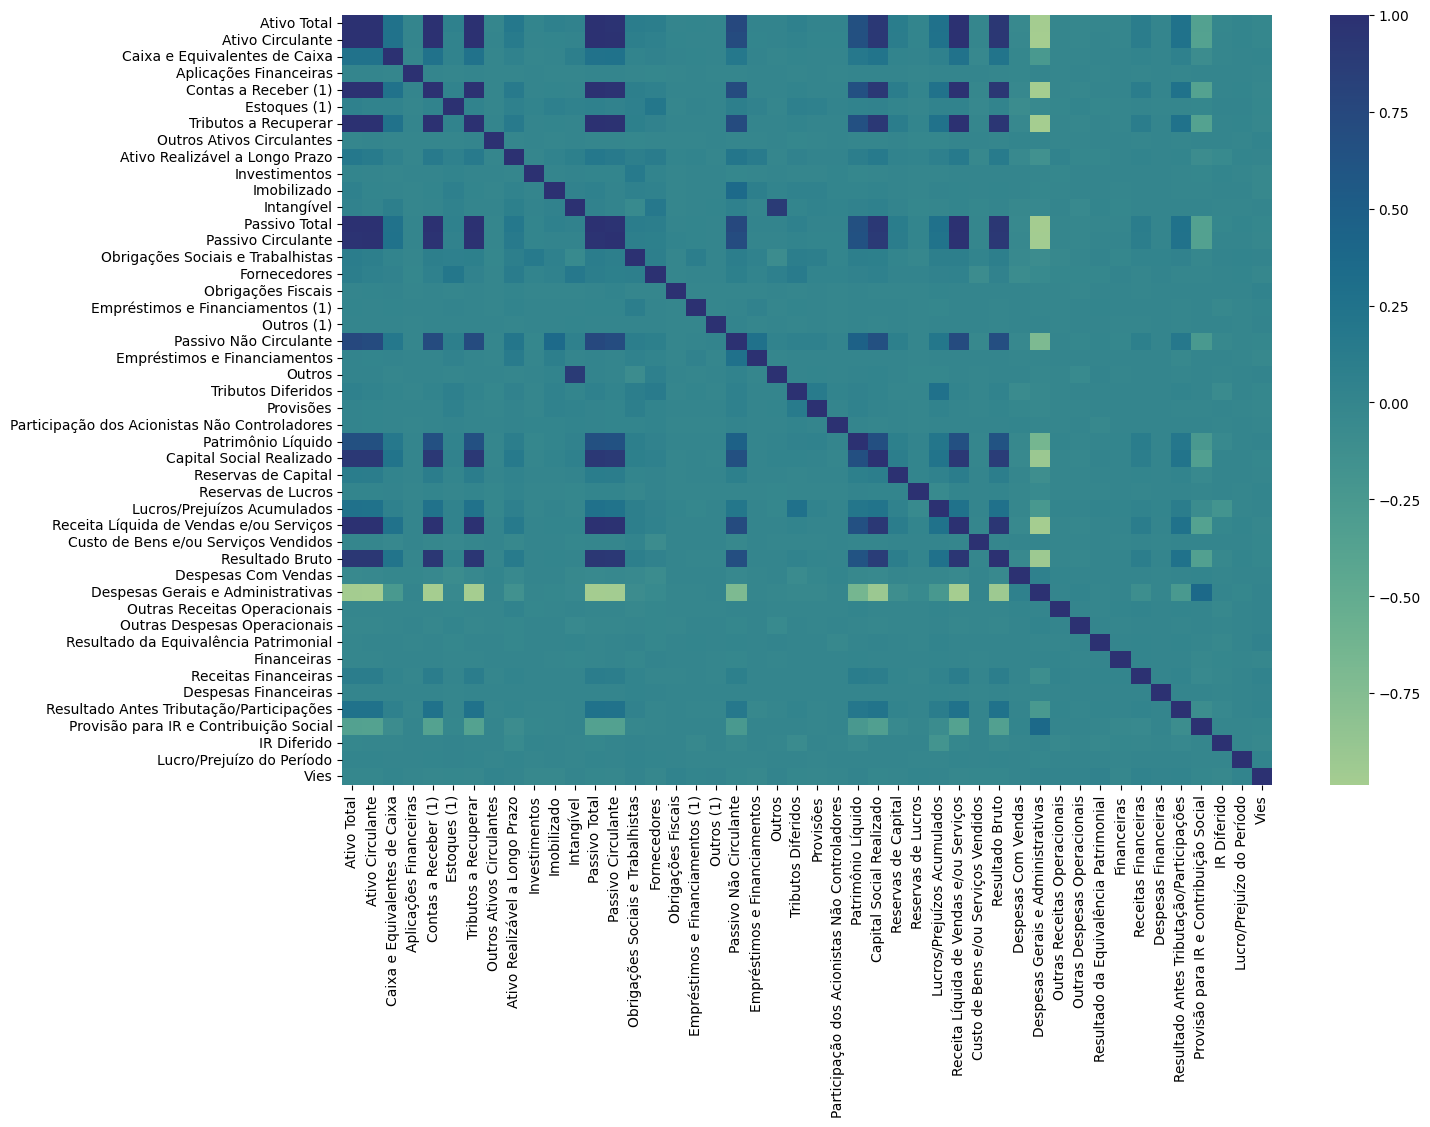

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Investimentos,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Vies
Ativo Total,1.000000,0.992258,0.252346,0.000383,0.988158,0.058295,0.989611,-0.002806,0.181541,0.012918,...,-0.019918,-0.002999,-0.003200,0.109080,4.030951e-04,0.258540,-0.365203,-0.011870,0.007008,-0.015886
Ativo Circulante,0.992258,1.000000,0.254456,0.001293,0.994456,0.033955,0.996548,-0.000498,0.145870,0.000313,...,-0.019137,0.002332,-0.001678,0.110784,-5.306128e-05,0.257699,-0.368725,-0.001240,0.007725,-0.015432
Caixa e Equivalentes de Caixa,0.252346,0.254456,1.000000,-0.003187,0.248107,0.030688,0.248005,-0.003694,0.046086,-0.005292,...,-0.003427,0.003797,0.004462,0.027091,1.099813e-03,0.062900,-0.091695,-0.001621,0.001540,0.008822
Aplicações Financeiras,0.000383,0.001293,-0.003187,1.000000,-0.000038,-0.004232,-0.000228,-0.001636,-0.008232,0.001649,...,0.001059,-0.005811,-0.000458,-0.003272,9.895897e-04,-0.001395,0.001046,-0.000216,-0.000794,-0.006503
Contas a Receber (1),0.988158,0.994456,0.248107,-0.000038,1.000000,0.032747,0.996566,-0.001117,0.149259,0.001208,...,-0.019267,0.001346,-0.000602,0.110926,2.734174e-04,0.256610,-0.370171,0.000469,0.007347,-0.016829
Estoques (1),0.058295,0.033955,0.030688,-0.004232,0.032747,1.000000,0.034196,-0.003754,0.066766,0.029719,...,0.009431,-0.013849,-0.005969,0.005197,-3.089370e-03,-0.001861,-0.008762,0.014695,0.017989,-0.009084
Tributos a Recuperar,0.989611,0.996548,0.248005,-0.000228,0.996566,0.034196,1.000000,-0.000501,0.147006,-0.000289,...,-0.019165,0.002086,-0.001431,0.110648,3.125363e-04,0.256365,-0.371235,0.001171,0.006983,-0.020130
Outros Ativos Circulantes,-0.002806,-0.000498,-0.003694,-0.001636,-0.001117,-0.003754,-0.000501,1.000000,-0.002098,0.000074,...,-0.001453,0.002477,-0.000285,-0.003927,6.161298e-04,-0.002726,0.000820,0.001799,-0.000970,0.028903
Ativo Realizável a Longo Prazo,0.181541,0.145870,0.046086,-0.008232,0.149259,0.066766,0.147006,-0.002098,1.000000,-0.006931,...,-0.013435,-0.012821,0.000695,0.022992,2.255551e-03,0.012767,-0.089151,-0.051836,0.009476,0.004440
Investimentos,0.012918,0.000313,-0.005292,0.001649,0.001208,0.029719,-0.000289,0.000074,-0.006931,1.000000,...,0.001024,-0.000056,0.005377,0.000548,9.490169e-04,-0.002260,-0.010417,0.009229,-0.001210,-0.025514


In [ ]:
correlacoes = base_dados.corr() # Calcula a matriz de correlação do DataFrame (correlação entre todas as combinações de pares de colunas).

fig, ax = plt.subplots(figsize = (15, 10)) # Cria uma figura e um eixo para o gráfico.
sns.heatmap(correlacoes, cmap = 'crest', ax = ax) # Cria um heatmap da matriz de correlação.
plt.show() # Exibe o heatmap criado.
display(correlacoes) # Exibe a matriz de correlação.

Verificando a matriz de correlação e exibindo os pares de variáveis com uma correlação absoluta maior que 0.9.

In [ ]:
correlacoes_encontradas = [] # Inicializa uma lista vazia para armazenar as correlações encontradas.

for coluna in correlacoes:
  for linha in correlacoes.index:
    if linha != coluna: # Verifica se a linha e a coluna não são iguais.
      valor = abs(correlacoes.loc[linha, coluna]) # Calcula o valor absoluto da correlação entre a variável da linha e a variável da coluna.
      if valor > 0.8 and (coluna, linha, valor) not in correlacoes_encontradas: # Verifica se a correlação absoluta é maior que 0.9 e se o par de colunas ainda não foi adicionado à lista correlacoes_encontradas.
        correlacoes_encontradas.append((linha, coluna, valor)) # Adiciona uma tupla contendo a linha, a coluna e o valor absoluto da correlação à lista 'correlacoes_encontradas'.
        print(f'Correlação encontrada: {linha} e {coluna} ({valor})') # Exibe uma mensagem indicando que uma correlação foi encontrada, juntamente com o nome das variáveis e o valor absoluto da correlação.

Correlação encontrada: Ativo Circulante e Ativo Total (0.9922577341949755)
Correlação encontrada: Contas a Receber (1) e Ativo Total (0.9881579384580866)
Correlação encontrada: Tributos a Recuperar e Ativo Total (0.9896111141234379)
Correlação encontrada: Passivo Total e Ativo Total (1.0)
Correlação encontrada: Passivo Circulante e Ativo Total (0.9737083238074469)
Correlação encontrada: Capital Social Realizado e Ativo Total (0.9211583364115005)
Correlação encontrada: Receita Líquida de Vendas e/ou Serviços e Ativo Total (0.9900752432692963)
Correlação encontrada: Resultado Bruto e Ativo Total (0.9315860858852675)
Correlação encontrada: Despesas Gerais e Administrativas e Ativo Total (0.9783679381060522)
Correlação encontrada: Contas a Receber (1) e Ativo Circulante (0.9944557607052497)
Correlação encontrada: Tributos a Recuperar e Ativo Circulante (0.9965483417169768)
Correlação encontrada: Passivo Total e Ativo Circulante (0.9922577341949754)
Correlação encontrada: Passivo Circulante

> *Podemos observar que as nove primeiras correlações identificadas possuem uma correlação muito forte com "Ativo Total". Portanto, a sugestão é eliminar essas variáveis e manter somente o "Ativo Total". Essa abordagem é adotada porque, ao remover essas variáveis, pode-se reduzir o risco de que elas também apresentem correlações muito fortes entre si.*

In [ ]:
remover = [
    'Ativo Circulante',
    'Contas a Receber (1)',
    'Tributos a Recuperar',
    'Passivo Total',
    'Passivo Circulante',
    'Capital Social Realizado',
    'Receita Líquida de Vendas e/ou Serviços',
    'Resultado Bruto',
    'Despesas Gerais e Administrativas',
    'Outros',
    'Intangível'
] # Cria uma lista contendo os nomes das variáveis que devem ser removidas.

base_dados = base_dados.drop(remover, axis = 1) # Remove as variáveis.

Criando novamente a matriz de correlação do DataFrame, criando um heatmap dessa matriz, e exibindo o heatmap e a matriz de correlação.

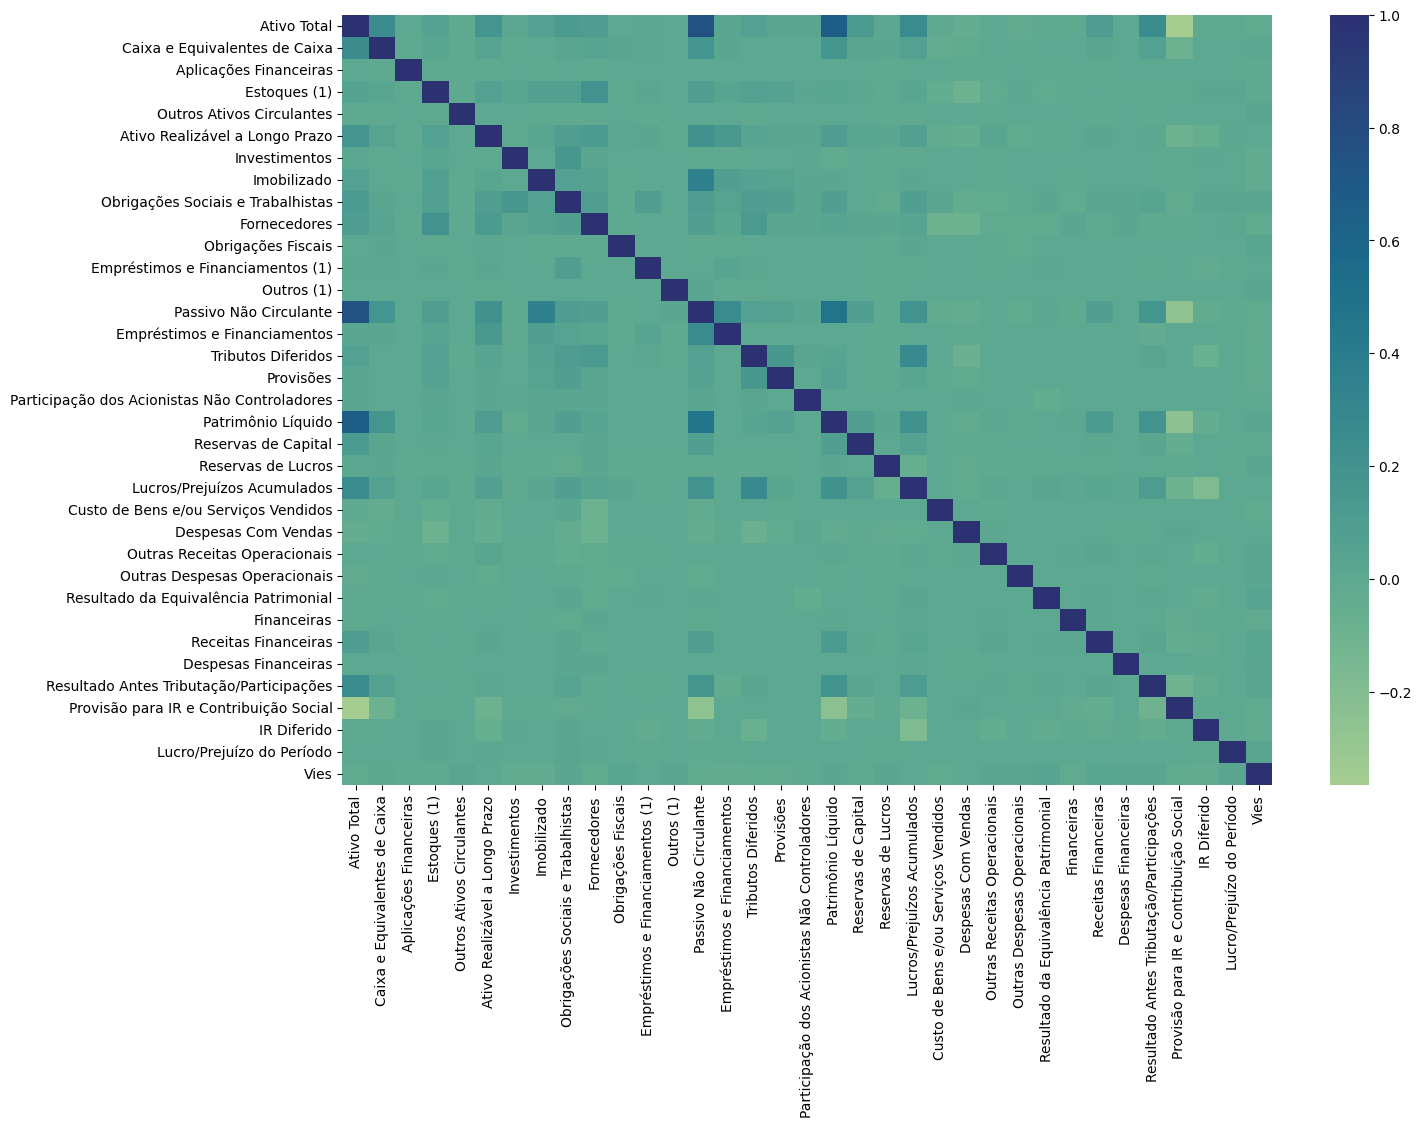

,Ativo Total,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Estoques (1),Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Investimentos,Imobilizado,Obrigações Sociais e Trabalhistas,Fornecedores,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Vies
Ativo Total,1.000000,0.252346,0.000383,0.058295,-0.002806,0.181541,0.012918,0.062829,0.115276,0.107624,...,-0.019918,-0.002999,-0.003200,0.109080,4.030951e-04,0.258540,-0.365203,-0.011870,0.007008,-0.015886
Caixa e Equivalentes de Caixa,0.252346,1.000000,-0.003187,0.030688,-0.003694,0.046086,-0.005292,0.000016,0.025168,0.038706,...,-0.003427,0.003797,0.004462,0.027091,1.099813e-03,0.062900,-0.091695,-0.001621,0.001540,0.008822
Aplicações Financeiras,0.000383,-0.003187,1.000000,-0.004232,-0.001636,-0.008232,0.001649,-0.003687,-0.002042,-0.011198,...,0.001059,-0.005811,-0.000458,-0.003272,9.895897e-04,-0.001395,0.001046,-0.000216,-0.000794,-0.006503
Estoques (1),0.058295,0.030688,-0.004232,1.000000,-0.003754,0.066766,0.029719,0.076718,0.075696,0.197424,...,0.009431,-0.013849,-0.005969,0.005197,-3.089370e-03,-0.001861,-0.008762,0.014695,0.017989,-0.009084
Outros Ativos Circulantes,-0.002806,-0.003694,-0.001636,-0.003754,1.000000,-0.002098,0.000074,-0.003800,-0.012054,-0.005329,...,-0.001453,0.002477,-0.000285,-0.003927,6.161298e-04,-0.002726,0.000820,0.001799,-0.000970,0.028903
Ativo Realizável a Longo Prazo,0.181541,0.046086,-0.008232,0.066766,-0.002098,1.000000,-0.006931,0.033750,0.088602,0.124004,...,-0.013435,-0.012821,0.000695,0.022992,2.255551e-03,0.012767,-0.089151,-0.051836,0.009476,0.004440
Investimentos,0.012918,-0.005292,0.001649,0.029719,0.000074,-0.006931,1.000000,0.002601,0.158018,0.026965,...,0.001024,-0.000056,0.005377,0.000548,9.490169e-04,-0.002260,-0.010417,0.009229,-0.001210,-0.025514
Imobilizado,0.062829,0.000016,-0.003687,0.076718,-0.003800,0.033750,0.002601,1.000000,0.064016,0.051056,...,-0.000421,-0.000601,-0.003235,0.002342,8.914350e-04,-0.001169,-0.006691,0.001626,-0.000667,-0.026785
Obrigações Sociais e Trabalhistas,0.115276,0.025168,-0.002042,0.075696,-0.012054,0.088602,0.158018,0.064016,1.000000,0.084886,...,-0.008049,0.021978,-0.013563,0.025590,2.341257e-02,0.043620,-0.021389,0.018459,0.025757,0.021738
Fornecedores,0.107624,0.038706,-0.011198,0.197424,-0.005329,0.124004,0.026965,0.051056,0.084886,1.000000,...,-0.014251,-0.014119,0.016270,-0.006773,1.511764e-02,-0.003726,-0.006411,0.004351,0.008319,-0.016736


In [ ]:
correlacoes = base_dados.corr()

fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlacoes, cmap = 'crest', ax = ax)
plt.show()
display(correlacoes)

Verificando novamente a matriz de correlação e exibindo, se ainda houver, os pares de variáveis com uma correlação absoluta maior que 0.9.

In [ ]:
correlacoes_encontradas = []

for coluna in correlacoes:
  for linha in correlacoes.index:
    if linha != coluna:
      valor = abs(correlacoes.loc[linha, coluna])
      if valor > 0.8:
        correlacoes_encontradas.append((linha, coluna, valor))
        print(f'Correlação encontrada: {linha} e {coluna} ({valor})')

## **Feature Selection**

> *A etapa de Feature Selection (Seleção de Características) tem como objetivo escolher as variáveis mais relevantes para o modelo que será construído. Isso pode melhorar a performance do modelo, reduzir a complexidade e diminuir o tempo de treinamento.*

Treinando um modelo de classificação ExtraTreesClassifier com os dados do DataFrame, exibindo a importância das características (variáveis) no modelo e identificando as 10 características mais importantes.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier # Importa a classe ExtraTreesClassifier do módulo ensemble na biblioteca scikit-learn.

modelo = ExtraTreesClassifier(random_state=1) # Cria uma instância da classe ExtraTreesClassifier com um random_state fixo para garantir a reprodutibilidade dos resultados.
x = base_dados.drop("Vies", axis=1) # A variável x é definida como o DataFrame com a coluna 'Vies' removida, visto que ela é a variável de resposta.
y = base_dados["Vies"] # A variável y é definida como a coluna 'Vies' do DataFrame.
modelo.fit(x, y) # Treinar o modelo de classificação usando os dados em x como variáveis preditoras e y como a variável de resposta.

informacoes_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending = False) # A importância das características no modelo treinado é obtida usando o atributo feature_importances_ do modelo.
display(informacoes_importantes) # Exibe o DataFrame 'informacoes_importantes'.

top10 = list(informacoes_importantes.index)[:10] # Os 10 principais recursos mais importantes são identificados e armazenados na variável top10.
print(f'\nTOP 10: {top10}') # Exibe a lista top10 com as 10 características mais importantes no modelo.

,0
Lucros/Prejuízos Acumulados,0.033430
Provisão para IR e Contribuição Social,0.032312
Obrigações Fiscais,0.031666
Lucro/Prejuízo do Período,0.031491
Outros Ativos Circulantes,0.031427
IR Diferido,0.031413
Fornecedores,0.031058
Obrigações Sociais e Trabalhistas,0.031000
Resultado Antes Tributação/Participações,0.030588
Receitas Financeiras,0.030508



TOP 10: ['Lucros/Prejuízos Acumulados', 'Provisão para IR e Contribuição Social', 'Obrigações Fiscais', 'Lucro/Prejuízo do Período', 'Outros Ativos Circulantes', 'IR Diferido', 'Fornecedores', 'Obrigações Sociais e Trabalhistas', 'Resultado Antes Tributação/Participações', 'Receitas Financeiras']


# **Criação da Inteligência Artificial**

## **StandardScaler**

> *O StandardScaler é uma técnica de pré-processamento de dados que tem como objetivo de padronizar e normalizar as características (features) do conjunto de dados.*

Definindo uma função para padronizar as variáveis do DataFrame, exceto a variável de resposta 'Vies':

In [ ]:
from sklearn.preprocessing import StandardScaler # Importa a classe StandardScaler da biblioteca scikit-learn para padronizar as características.

def adjust_scale(tabela):
  scaler = StandardScaler() # Cria uma instância da classe StandardScaler.
  tabela_aux = tabela.drop('Vies', axis= 1) # Cria uma cópia do DataFrame tabela, excluindo a coluna 'Vies'.

  tabela_aux = pd.DataFrame(scaler.fit_transform(tabela_aux), tabela_aux.index, tabela_aux.columns) # Padroniza as características em 'tabela_aux'.
  tabela_aux['Vies'] = tabela['Vies'] # Adiciona a coluna 'Vies' de volta ao DataFrame 'tabela_aux'.
  return tabela_aux # Retorna o DataFrame 'tabela_aux' padronizado.

Aplicando a função 'adjust_scale' e selecionando as 10 características mais importantes identificadas anteriormente:

In [ ]:
base_dados_new = adjust_scale(base_dados) # Aplica a função 'adjust_scale' ao DataFrame.
top10.append('Vies') # Adiciona a string 'Vies' à lista top10.

base_dados_new = base_dados_new[top10] # Seleciona as 10 características mais importantes.
display(base_dados_new) # Exibe o novo DataFrame que contém apenas as 10 características mais importantes, todas padronizadas.

,Lucros/Prejuízos Acumulados,Provisão para IR e Contribuição Social,Obrigações Fiscais,Lucro/Prejuízo do Período,Outros Ativos Circulantes,IR Diferido,Fornecedores,Obrigações Sociais e Trabalhistas,Resultado Antes Tributação/Participações,Receitas Financeiras,Vies
0,12.475429,-18.506543,0.015511,0.356140,-0.023095,0.062257,2.204906,4.137595,12.791215,5.520473,0
1,0.127182,0.034700,-0.044319,-0.026336,-0.028915,-0.055962,0.138030,0.638442,-0.024101,-0.021954,2
2,-0.453366,0.025996,-0.020131,-0.024152,-0.028816,0.037056,0.862364,1.258738,0.043980,0.132546,2
3,0.233630,0.032555,-0.045869,-0.031621,-0.028612,0.062257,-0.488485,-1.311204,-0.073595,-0.110743,0
4,0.412122,0.036029,-0.045391,-0.030180,-0.029725,-0.051430,-0.234039,-0.521962,-0.052194,-0.029825,2
...,...,...,...,...,...,...,...,...,...,...,...
2480,0.046794,0.028137,-0.016156,-0.030930,-0.028390,0.062257,0.268571,0.224609,-0.065597,-0.059986,0
2481,-0.453366,0.037424,-0.027117,-0.033012,-0.028722,-0.048828,-0.775748,-1.681353,-0.094024,-0.096757,0
2482,0.233630,0.028137,-0.060908,-0.026354,-0.031201,0.064713,0.725269,0.689061,0.012554,0.187909,0
2483,-0.397554,0.035348,-0.045759,-0.033012,-0.028050,-0.033368,-0.621143,-0.671263,-0.094024,-0.138272,0


## **Dados de Treino e Dados Teste**

> *A separação dos dados em conjuntos de treino e teste é feita para avaliar a performance de um modelo de machine learning.*

Dividindo os dados do DataFrame em conjuntos de treinamento e teste:

In [ ]:
from sklearn.model_selection import train_test_split # Importa a função train_test_split da biblioteca scikit-learn, usada para dividir arrays ou matrizes em subconjuntos aleatórios de treino e teste.

x = base_dados_new.drop('Vies', axis = 1) # A variável x é definida como o DataFrame com a coluna 'Vies' removida.
y = base_dados_new['Vies'] # A variável y é definida como a coluna 'Vies' do DataFrame.

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 1) # A função train_test_split é chamada com os dados x e y como argumentos, juntamente com um random_state fixo para garantir a reprodutibilidade dos resultados.

print("Os dados foram divididos em conjuntos de treinamento e teste que serão usados para treinar e avaliar o modelo de machine learning.")

Os dados foram divididos em conjuntos de treinamento e teste que serão usados para treinar e avaliar o modelo de machine learning.


## **Dummy Classifier**

> *Um Dummy Classifier é um tipo de modelo de aprendizado de máquina que faz previsões usando estratégias muito simples, pois ele não aprende com os dados e faz previsões com base em regras simples e heurísticas. É muito útil para servir como uma linha de base para comparar o desempenho de modelos mais complexos.*

Treinando um modelo de classificação Dummy com os dados de treinamento e fazendo previsões com os dados de teste:

In [ ]:
from sklearn.dummy import DummyClassifier # Importa a classe DummyClassifier para fazer previsões usando regras simples.
from sklearn.metrics import classification_report, confusion_matrix # Importa duas funções de métricas para avaliar o desempenho do modelo.

dummy = DummyClassifier(strategy = 'stratified', random_state = 2) # Gera previsões aleatórias de acordo com a distribuição das classes de treinamento.
dummy.fit(x_treino, y_treino) # Treina o modelo Dummy usando os dados de treinamento.
previsao_dummy = dummy.predict(x_teste) # Faz previsões usando o modelo Dummy nos dados de teste.

print("O modelo Dummy foi treinado e foram feitas previsões com esse modelo usando os dados de teste.")

O modelo Dummy foi treinado e foram feitas previsões com esse modelo usando os dados de teste.


### **Métricas de Avaliação**

> *Precision se concentra na precisão das previsões positivas do modelo, enquanto Recall se concentra na abrangência das previsões positivas. No nosso caso, a precisão (precision) é mais importante, porque uma precisão alta indica que, quando o modelo prevê que uma ação deve ser comprada (ou vendida), é mais provável que essa previsão esteja correta, evitando investir em ações que não irão se valorizar.*

Avaliando o desempenho do modelo de classificação, exibindo um relatório e uma matriz de confusão:


🤖 Dummy

              precision    recall  f1-score   support

           0       0.53      0.45      0.49       348
           2       0.41      0.48      0.44       274

    accuracy                           0.46       622
   macro avg       0.47      0.47      0.46       622
weighted avg       0.47      0.46      0.47       622



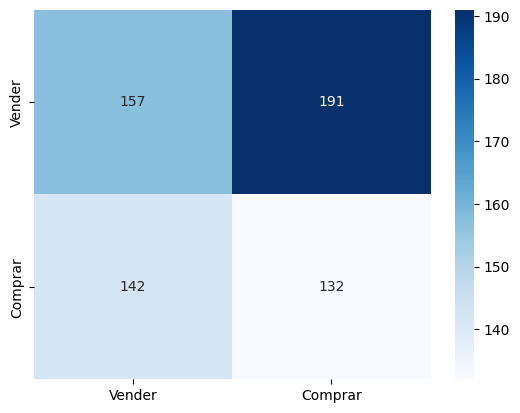

In [ ]:
def avaliar(y_teste, previsoes, nome_modelo):
  print(f'\n🤖 {nome_modelo}\n')
  report = classification_report(y_teste, previsoes) # Gera um relatório de classificação.
  print(report)
  cf_matrix = pd.DataFrame(confusion_matrix(y_teste, previsoes), index = ['Vender', 'Comprar'], columns = ['Vender', 'Comprar']) # Gera uma matriz confusão para avaliar a precisão do modelo de classificação.
  sns.heatmap(cf_matrix, annot = True, cmap = 'Blues', fmt = ',') # Exibe a matriz de confusão como um heatmap.
  plt.show() # Exibe o gráfico gerado.

avaliar(y_teste, previsao_dummy, 'Dummy')

## **Modelos de Teste**

* AdaBoost
* Decision Tree
* Random Forest
* ExtraTree
* Gradient Boost
* K Nearest Neighboors (KNN)
* Logistic Regression
* Naive Bayes
* Support Vector Machine (SVM)
* Rede Neural

Inicializando vários modelos de classificação de machine learning e armazenando-os em um dicionário:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {
    "AdaBoost": AdaBoostClassifier(random_state=1),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "ExtraTree": ExtraTreesClassifier(random_state=1),
    "GradientBoost": GradientBoostingClassifier(random_state=1),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=1),
    "NaiveBayes": GaussianNB(),
    "SVM": SVC(random_state=1),
    "RedeNeural": MLPClassifier(random_state=1, max_iter=400),
}

Treinando cada modelo, fazendo previsões com os dados de teste e avaliando o desempenho do modelo.


🤖 AdaBoost

              precision    recall  f1-score   support

           0       0.60      0.53      0.56       348
           2       0.48      0.55      0.51       274

    accuracy                           0.54       622
   macro avg       0.54      0.54      0.54       622
weighted avg       0.55      0.54      0.54       622



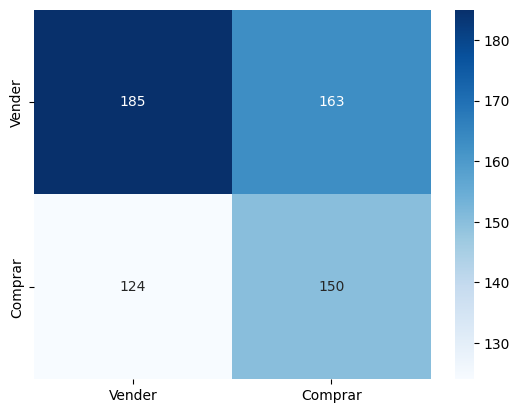


🤖 DecisionTree

              precision    recall  f1-score   support

           0       0.59      0.51      0.55       348
           2       0.47      0.55      0.51       274

    accuracy                           0.53       622
   macro avg       0.53      0.53      0.53       622
weighted avg       0.54      0.53      0.53       622



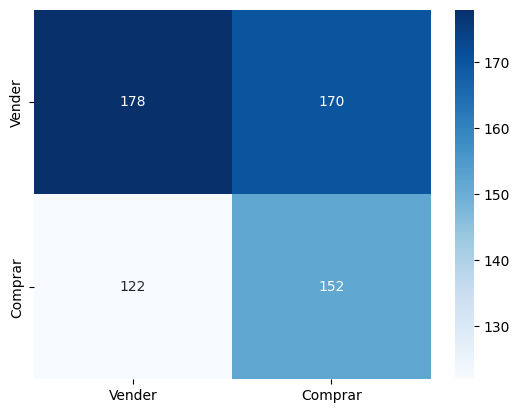


🤖 RandomForest

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       348
           2       0.52      0.57      0.55       274

    accuracy                           0.58       622
   macro avg       0.58      0.58      0.58       622
weighted avg       0.59      0.58      0.58       622



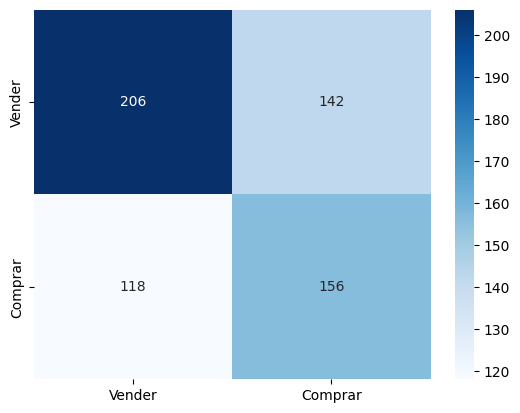


🤖 ExtraTree

              precision    recall  f1-score   support

           0       0.61      0.57      0.59       348
           2       0.50      0.55      0.52       274

    accuracy                           0.56       622
   macro avg       0.56      0.56      0.56       622
weighted avg       0.56      0.56      0.56       622



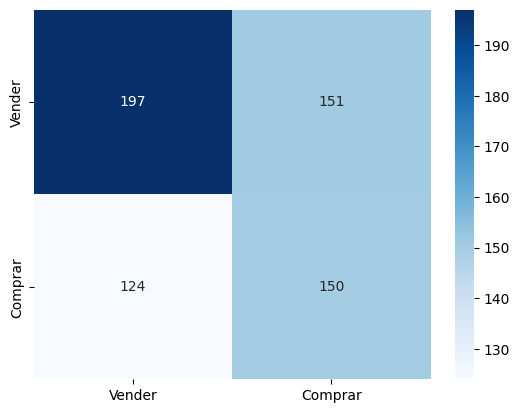


🤖 GradientBoost

              precision    recall  f1-score   support

           0       0.61      0.54      0.57       348
           2       0.49      0.56      0.52       274

    accuracy                           0.55       622
   macro avg       0.55      0.55      0.55       622
weighted avg       0.55      0.55      0.55       622



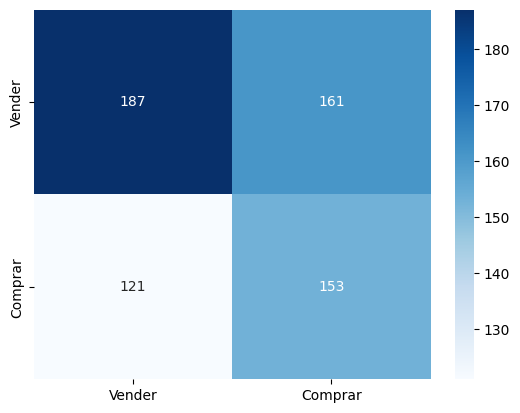


🤖 KNN

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       348
           2       0.49      0.53      0.51       274

    accuracy                           0.55       622
   macro avg       0.54      0.54      0.54       622
weighted avg       0.55      0.55      0.55       622



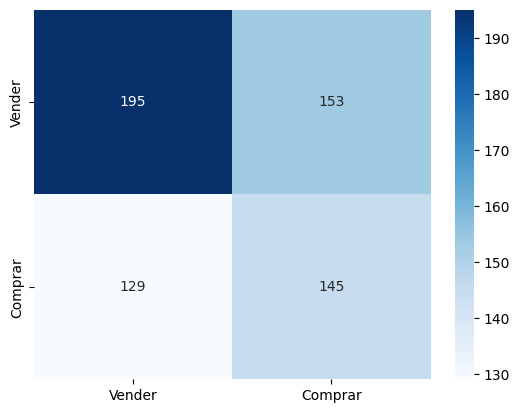


🤖 LogisticRegression

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       348
           2       0.46      0.39      0.42       274

    accuracy                           0.53       622
   macro avg       0.52      0.52      0.52       622
weighted avg       0.53      0.53      0.53       622



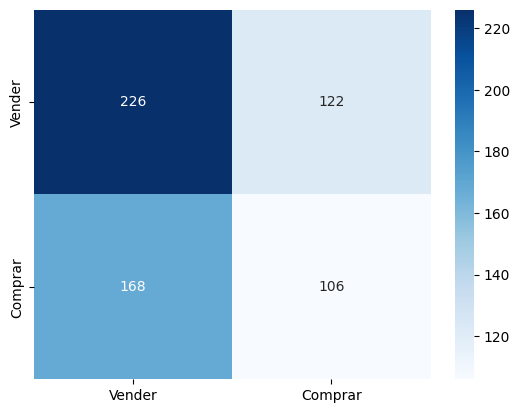


🤖 NaiveBayes

              precision    recall  f1-score   support

           0       0.56      0.98      0.71       348
           2       0.42      0.02      0.03       274

    accuracy                           0.56       622
   macro avg       0.49      0.50      0.37       622
weighted avg       0.50      0.56      0.41       622



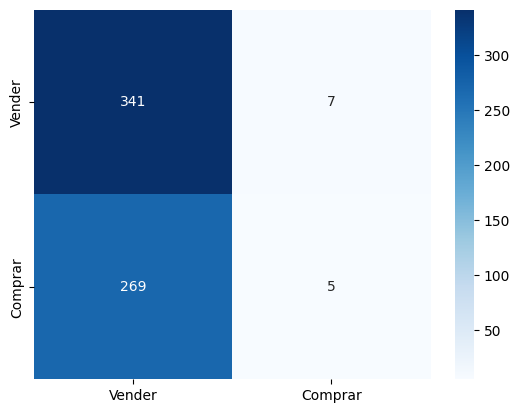


🤖 SVM

              precision    recall  f1-score   support

           0       0.58      0.82      0.68       348
           2       0.52      0.24      0.33       274

    accuracy                           0.57       622
   macro avg       0.55      0.53      0.51       622
weighted avg       0.55      0.57      0.53       622



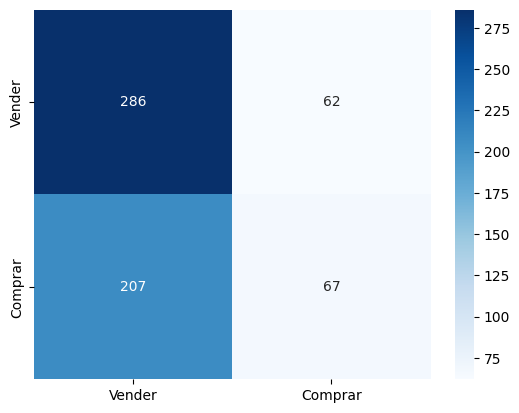

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.




🤖 RedeNeural

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       348
           2       0.50      0.57      0.53       274

    accuracy                           0.56       622
   macro avg       0.56      0.56      0.55       622
weighted avg       0.56      0.56      0.56       622



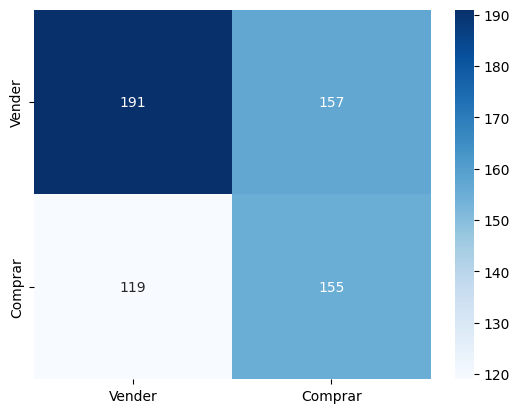

In [ ]:
for nome_modelo in modelos:
  modelo = modelos[nome_modelo] # Obtém o objeto do modelo do dicionário usando o nome do modelo como chave.
  modelo.fit(x_treino, y_treino) # Treina o modelo usando os dados de treinamento.
  previsoes = modelo.predict(x_teste) # Faz previsões usando o modelo nos dados de teste.
  avaliar(y_teste, previsoes, nome_modelo) # Avalia a o desempenho do modelo.
  modelos[nome_modelo] = modelo # Atualiza o objeto do modelo.

Ao realizar os testes, dois modelos se destacaram: RandomForest e SVM. Ambos apresentaram a mesma precisão (precision) de 52%, indicando que, dos exemplos classificados como positivos por esses modelos, 52% eram de fato positivos.

Em relação ao recall, o RandomForest obteve 57%, enquanto o SVM alcançou 24%. Isso significa que o RandomForest foi capaz de identificar uma proporção maior de instâncias positivas reais em comparação com o SVM.

Neste projeto, a precisão é o critério principal para comparação, enquanto o recall é secundário. Portanto, o RandomForest se torna a escolha mais adequada para o projeto, uma vez que apresenta desempenho igual ao do SVM em precisão, mas supera-o em recall.

Embora o F1-Score seja importante quando precisão e recall têm a mesma importância, esse não é o caso neste projeto, tornando-o menos relevante para a comparação. No entanto, vale destacar que o RandomForest também tem um F1-Score mais alto, o que reforça sua superioridade em relação ao SVM.

## **Ajuste de Parâmetros**

> *O "Ajuste de Parâmetros" ou "Tuning do Modelo" é o processo de otimização dos parâmetros de um modelo de machine learning para melhorar o seu desempenho. Os parâmetros de um modelo são os aspectos internos do modelo que são aprendidos durante o treinamento.*
>
> *O Tuning do Modelo envolve ajustar esses hiperparâmetros para encontrar a configuração que resulta no melhor desempenho do modelo.*
>
> *A técnica utilizada para o "tuning" do modelo foi a Grid Search. Esta técnica envolve a definição de uma "grade" de valores de hiperparâmetros e a avaliação de todas as combinações possíveis.*

Realizando uma busca em grade (GridSearch) para otimizar hiperparâmetros do modelo RandomForest:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos['RandomForest'] # Seleciona o modelo RandomForest que foi treinado.

n_estimators = range(10, 251, 30) # Define uma faixa de valores para o hiperparâmetro 'n_estimators'.
max_features = list(range(2, 11, 2)) # Define uma faixa de valores para o hiperparâmetro 'max_features'.
max_features.append('auto') # Adiciona o valo 'auto' à lista de valores possíveis para 'max_features'.
min_samples_split = range(2, 11, 2) # Define uma faixa de valores para o hiperparâmetro 'min_samples_split'.

precision2_score = make_scorer(precision_score, labels=[2], average='macro') # Calcula a pontuação de precisão para a classe 2 (comprar).

grid = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'min_samples_split': min_samples_split,
        'random_state': [1]
    },
    scoring = precision2_score,
)

resultado_grid = grid.fit(x_treino, y_treino) # Treina o modelo com diferentes combinações de hiperparâmetros e escolhe a que maximiza a pontuação de precisão.
print("Ajuste feito")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifi

Ajuste feito


Utilizando o modelo ajustado, fazendo previsões com os dados de teste e avaliando o desempenho:


🤖 RandomForest Otimizado

              precision    recall  f1-score   support

           0       0.63      0.59      0.61       348
           2       0.52      0.57      0.54       274

    accuracy                           0.58       622
   macro avg       0.58      0.58      0.58       622
weighted avg       0.58      0.58      0.58       622



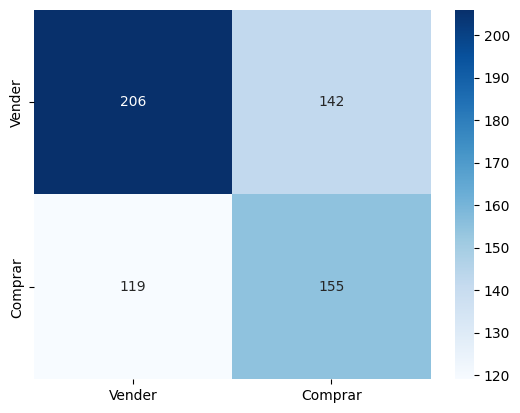

In [ ]:
modelo_ajustado = resultado_grid.best_estimator_ # Obtém o melhor estimador do resultado.
previsoes = modelo_ajustado.predict(x_teste) # Usa o modelo ajustado para fazer previsões nos dados de teste.
avaliar(y_teste, previsoes, "RandomForest Otimizado") # Avalia o desempenho do modelo ajustado.

# **Avaliação**

> *O objetivo é que a inteligência artificial consiga escolher boas ações a nos ajude a construir uma carteira rentável. Para isso, pegaremos o último trimestre, que não foi usado para treinamento/teste e avaliar o seu desempenho.*

Filtrando os dados de fundamentos para manter apenas o último trimestre de cada empresa, redefinindo o índice e criando um novo DataFrame com esses dados:

In [ ]:
fundamentos_ult_tri = fundamentos.copy() # Cria uma cópia do dicionário 'fundamentos'.
base_dados_ult_tri = pd.DataFrame() # Cria um novo DataFrame vazio.

lista_empresas = [] # Inicializa uma lista vazia.

for empresa in fundamentos_ult_tri:
    fundamentos_ult_tri[empresa] = fundamentos_ult_tri[empresa][-1:] # Filtra o DataFrame de Fundamentos da empresa para manter apenas a última linha, que representa o último trimestre.
    fundamentos_ult_tri[empresa] = fundamentos_ult_tri[empresa].reset_index(drop=True) # Redefine o índice do DataFrame para que comece do 0.
    base_dados_ult_tri = base_dados_ult_tri.append(fundamentos_ult_tri[empresa]) # Adiciona o DataFrame de fundamentos da empresa ao DataFrame 'base_dados_ult_tri'.
    lista_empresas.append(empresa) # Adiciona o nome da empresa à lista.

Exibindo o DataFrame e a lista de empresas:

In [ ]:
display(base_dados_ult_tri)
print(lista_empresas)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber (1),Estoques (1),Tributos a Recuperar,Outros Ativos Circulantes,Ativo Realizável a Longo Prazo,Investimentos,...,Outras Despesas Operacionais,Resultado da Equivalência Patrimonial,Financeiras,Receitas Financeiras,Despesas Financeiras,Resultado Antes Tributação/Participações,Provisão para IR e Contribuição Social,IR Diferido,Lucro/Prejuízo do Período,Vies
0,-0.028902,-0.090003,-0.157301,-0.662640,-0.006945,0.034248,0.053713,-0.395220,0.024836,0.045207,...,-1.103975,-7.981308,0.136790,-0.061362,0.101710,0.543395,1.000000,-1.000000,0.597807,0
0,0.074590,0.201141,1.686971,0.000000,0.265551,-0.040511,0.212556,-0.036407,-0.174892,-0.042391,...,-2.340635,0.714579,0.513533,1.000000,-1.000000,-1.000000,1.000000,0.646761,-1.000000,0
0,-0.003639,0.025228,-0.036724,-0.027200,0.014402,0.000000,0.410738,0.765349,0.595486,-0.033591,...,-5.003948,-0.912423,-0.174473,0.796961,-0.444542,-1.000000,0.810899,-0.471588,-1.000000,0
0,0.050230,0.039963,-0.615310,-0.050046,0.201611,0.022515,0.096936,-0.223755,0.034113,0.000000,...,0.288270,0.000000,-3.193585,-0.866116,-0.263364,-0.163058,-0.148875,1.000000,0.078815,0
0,-0.024125,-0.073993,-0.387536,-0.015252,0.113766,0.000000,0.447947,-0.613616,0.128106,0.000394,...,0.000000,-0.605641,1.000000,-0.081339,0.288739,0.010808,0.000952,-0.522721,-0.024556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.040277,0.076246,-0.117937,0.422222,0.938834,-0.178862,0.431127,0.493660,0.040193,-0.033484,...,-0.517345,-0.057357,-1.000000,-0.351279,-1.000000,-0.442519,0.864493,1.000000,-0.160053,0
0,0.045034,0.125255,0.638799,0.000000,0.370532,-0.131505,0.140449,-0.050866,-0.014162,0.031128,...,-0.177358,-0.529412,-0.066556,0.000000,0.000000,0.287054,0.000000,0.000000,0.197044,0
0,-0.026566,-0.180638,-0.622671,0.032520,0.006125,0.024312,-0.017396,0.361647,-0.009787,0.067421,...,1.000000,-0.983086,-15.088204,-0.736183,0.211623,-0.196577,0.671442,-1.000000,-0.217711,0
0,0.015784,0.005360,0.228454,0.023388,0.004404,-0.040107,-0.350566,-0.101704,0.015918,-0.027624,...,-0.068438,0.000000,-1.000000,-0.264366,0.208301,-0.029257,0.240627,1.928620,0.030357,0


['ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'B3SA3', 'BEEF3', 'BRAP4', 'BRFS3', 'BRKM5', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSMG3', 'CSNA3', 'CYRE3', 'DIRR3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENEV3', 'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3', 'ITSA4', 'JBSS3', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PSSA3', 'RADL3', 'RENT3', 'SBSP3', 'SLCE3', 'SMTO3', 'STBP3', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'TRPL4', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']


Preparando o DataFrame para previsão, selecionando as colunas mais importantes, ajustando a escala dos dados, removendo a coluna 'Vies' e exibindo o DataFrame:

In [ ]:
base_dados_ult_tri = base_dados_ult_tri.reset_index(drop = True) # Redefine o índice do DataFrame para que comece do 0.
base_dados_ult_tri = base_dados_ult_tri[top10] # Seleciona as 10 colunas mais importantes do DataFrame.
base_dados_ult_tri = adjust_scale(base_dados_ult_tri) # Ajusta a escala dos dados no DataFrame.
base_dados_ult_tri = base_dados_ult_tri.drop("Vies", axis = 1) # Remove a coluna 'Vies' do DataFrame.

display(base_dados_ult_tri) # Exibe o DataFrame.

,Lucros/Prejuízos Acumulados,Provisão para IR e Contribuição Social,Obrigações Fiscais,Lucro/Prejuízo do Período,Outros Ativos Circulantes,IR Diferido,Fornecedores,Obrigações Sociais e Trabalhistas,Resultado Antes Tributação/Participações,Receitas Financeiras
0,-0.490273,0.482456,0.424974,0.290751,-0.337173,-0.240214,0.382340,0.464237,0.245174,0.135668
1,1.388514,0.482456,-0.697236,-0.002572,-0.109045,0.414075,-0.034915,-1.796464,0.026229,2.417876
2,-0.490273,0.391334,0.369035,-0.002572,0.400698,-0.030266,-1.191435,0.216321,0.026229,1.981288
3,-0.490273,-0.071149,0.723319,0.195476,-0.228158,0.554423,-0.049449,1.328882,0.144957,-1.594767
4,-0.490273,0.001048,0.364323,0.176499,-0.476025,-0.050582,2.004682,0.216321,0.169622,0.092711
...,...,...,...,...,...,...,...,...,...,...
61,-0.490273,0.417159,0.139381,0.151624,0.227962,0.554423,-0.660504,0.970476,0.105313,-0.487730
62,0.745148,0.000589,0.427716,0.217180,-0.118238,0.157105,0.203654,-0.570192,0.208810,0.267612
63,-0.490273,0.324134,-0.495970,0.141040,0.144031,-0.240214,-0.459582,0.058094,0.140202,-1.315377
64,-0.490273,0.116539,-0.714040,0.186580,-0.150560,0.923382,-0.926019,-1.412937,0.163938,-0.300844


In [ ]:
display(cotacoes['ABEV3']) # Exibe o DataFrame da empresa 'ABEV3'.

,Open,High,Low,Close,Adj Close,Volume,Empresa
Date,,,,,,,
2012-12-28,16.858280,16.916273,16.738293,16.738293,11.353687,2807786.0,ABEV3
2013-01-02,16.980267,17.050261,16.768290,16.806286,11.399805,1126114.0,ABEV3
2013-01-03,16.942270,17.114254,16.820284,17.104256,11.601918,1032105.0,ABEV3
2013-01-04,17.104256,17.104256,16.798286,16.822285,11.410659,1488651.0,ABEV3
2013-01-07,16.802286,17.018265,16.798286,17.016264,11.542237,1223124.0,ABEV3
...,...,...,...,...,...,...,...
2022-12-26,14.570000,14.640000,14.450000,14.520000,14.520000,4149300.0,ABEV3
2022-12-27,14.600000,14.660000,14.420000,14.520000,14.520000,13135400.0,ABEV3
2022-12-28,14.600000,14.730000,14.520000,14.550000,14.550000,15002000.0,ABEV3


Fazendo as previsões para o último trimestre utilizando o modelo ajustado:

In [ ]:
previsoes_ult_tri = modelo_ajustado.predict(base_dados_ult_tri) # Usa o modelo ajustado para fazer as previsões com os dados do último trimestre.
print(previsoes_ult_tri)

carteira = []
carteira_inicial = []

for i, empresa in enumerate(lista_empresas):
    if previsoes_ult_tri[i] == 2: # Verifica se a previsão para a empresa é 2 (compra).
        print(empresa) # Exibe o nome da empresa recomendada para compra.
        carteira_inicial.append(1000) # Adiciona 1000 à lista.
        cotacao = cotacoes[empresa] # Obtém as cotações da empresa.
        cotacao_inicial = cotacao.loc["2022-09-30", "Adj Close"] # Obtém a cotação de fechamento ajustada no final do último trimestre.
        cotacao_final = cotacao.loc["2022-12-31", "Adj Close"] # Obtém a cotação de fechamento ajustada no final do trimestre seguintes.
        percentual = cotacao_final / cotacao_inicial # Calcula o percentual de variação entre a cotação final e a cotação inicial.
        carteira.append(1000 * percentual) # Calcula o valor final com base na cotação inicial de R$ 1000 e adiciona à lista.

saldo_inicial = sum(carteira_inicial) # Calcula o saldo inicial somando os valores da lista 'carteira_inicial.
saldo_final = sum(carteira) # Calcula o saldo final somando os valores da lista 'carteira'.
print(f'\nSaldo inicial: R$ {saldo_inicial:.2f}\nSaldo final: R$ {saldo_final:.2f}')
print(f'Variação da carteira: {(saldo_final / saldo_inicial):.2f}')

[2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 0 2 0 0 2 2 0 2 2 2 0 2 2 2 2 2
 0 2 2 0 2 0 0 2 2 2 2 0 0 2 0 0 0 0 2 0 2 0 0 0 2 2 0 0 2]
ABEV3
ALPA4
ALSO3
ARZZ3
B3SA3
BRAP4
BRKM5
CCRO3
CIEL3
CMIG4
COGN3
CPFE3
CSMG3
CSNA3
CYRE3
DIRR3
EGIE3
EMBR3
ENEV3
EQTL3
EZTC3
FLRY3
GOAU4
GOLL4
HYPE3
ITSA4
JBSS3
MDIA3
MGLU3
MRVE3
PETR3
PETR4
PRIO3
PSSA3
SBSP3
TAEE11
TOTS3
VALE3
VIIA3
YDUQ3

Saldo inicial: R$ 40000.00
Saldo final: R$ 38143.85
Variação da carteira: 0.95


> *O resultado final da nossa avaliação mostra que, se tivéssemos seguido as recomendações do modelo para comprar ações das empresas listadas, e investido 1.000 reais em cada uma delas, nossa carteira teria sofrido uma diminuição de valor.*
>
> *O saldo inicial de 40.000 reais representa o total do dinheiro investido, que é a soma de 1.000 reais para cada uma das 40 empresas recomendadas para compra pelas previsões do modelo.*
>
> *O saldo final de 38.143,85 é a soma dos valores finais das ações dessas 40 empresas no final do trimestre seguinte. Cada valor final é calculado como o produto de 1000 reais e a variação percentual nas cotações da ação entre o início e o final do trimestre.*
>
> *A variação da carteira é calculada como o saldo final dividido pelo saldo inicial, que é 0,95 ou 95%. Isso significa que o valor da nossa carteira de ações diminuiu em 5% ao longo do trimestre.*

> *Uma rentabilidade percentual negativa na performance de uma carteira de ações nem sempre implica em prejuízo ou desempenho inferior ao mercado. Isso ocorre porque os rendimentos gerados pelas ações podem impactar de três maneiras: se a carteira tiver um desempenho ruim, os rendimentos podem ser insuficientes para compensar as perdas, podem neutralizar o prejuízo ou até resultar em ganhos líquidos.*

# **Avaliação Comparativa**

> *Para sabermos se uma carteira de ações está indo bem ou mal, podemos compará-la com um benchmark, o Ibovespa, um índice que representa a performance média do mercado de ações brasileiro. Com isso, podemos ter uma ideia se a nossa carteira de ações está se saindo melhor ou pior do que o mercado em geral. Se o índice Ibovespa tiver um desempenho pior que nossa carteira de ações, isso pode ser positivo, sugerindo que a economia pode não estar prosperando, ou que nossa carteira foi menos afetada por influências externas do que a média do mercado. Caso contrário, se a carteira ficar atrás do índice, isso pode sinalizar a necessidade de reavaliar e ajustar a estratégia.*

Calculando e exibindo a variação percentual do IBOV entre o final do último trimestre e o final do trimestre seguinte:

In [ ]:
variacao_ibov = df_ibov.loc['2022-12-31', 'IBOV'] / df_ibov.loc["2022-09-30", "IBOV"] # Calcula a variação percentual do IBOV.
print(f'Variação do IBOV: {variacao_ibov}') # Exibe a variação percentual do IBOV.

Variação do IBOV: 0.9999454728863928


> *O resultado da variação do IBOV de 0,99 indica que o Índice Bovespa sofreu uma pequena diminuição entre o fim do último trimestre e o fim do trimestre seguinte.*
>
> *A carteira das ações recomendadas pelo modelo teve um desempenho pior do que o IBOV. A carteira diminuiu 5%, enquanto o IBOV diminuiu menos de 1%. Isso sugere que, neste período específico, teria sido mais vantajoso investir no IBOV do que nas ações específicas recomendadas pelo modelo.*